In [497]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
df = pd.read_csv('/kaggle/input/training-data22/train.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
df.drop(columns = ['Customer_ID', 'Name', 'SSN'], axis = 1, inplace = True)

In [5]:
df.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,February,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,March,-500,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,April,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
df.shape

(100000, 25)

In [7]:
for column in df.columns:
    print(f'{column} : {df[column].unique()}')
    print(f'{column} : {df[column].nunique()}')
    print(f'{column} : {df[column].value_counts()}')
    print('=============================================================')

ID : ['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']
ID : 100000
ID : ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64
Month : ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Month : 8
Month : Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
Age : ['23' '-500' '28_' ... '4808_' '2263' '1342']
Age : 1788
Age : Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: count, Length: 1788, dtype: int64
Occupation : ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
O

In [8]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [9]:
df.drop(columns = ['Type_of_Loan'], axis = 'columns', inplace = True)

In [10]:
df.shape

(100000, 24)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  object 
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [12]:
df.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,February,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,March,-500,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,April,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [13]:
df.isnull().sum()

ID                              0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  object 
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [15]:
cols1 = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt',
        'Amount_invested_monthly', 'Monthly_Balance']

In [16]:
def text_preprocessing(text):
    text = str(text)
    text = re.sub('[_]', '', text)
    return float(text)

In [17]:
data = df.copy()

In [18]:
data['Age'] = data['Age'].apply(text_preprocessing)

In [19]:
data['Annual_Income'] = data['Annual_Income'].apply(text_preprocessing)

In [20]:
data['Num_of_Loan'] = data['Num_of_Loan'].apply(text_preprocessing)

In [21]:
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].apply(text_preprocessing)

In [22]:
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].replace('_', np.nan)

In [23]:
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].apply(text_preprocessing)

In [24]:
data['Outstanding_Debt'] = data['Outstanding_Debt'].apply(text_preprocessing)

In [25]:
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].apply(text_preprocessing)

In [26]:
data['Monthly_Balance'] = data['Monthly_Balance'].apply(text_preprocessing)

In [27]:
for column in cols1:
    print('The number of null values in', column, 'column is:', data[column].isnull().sum())

The number of null values in Age column is: 0
The number of null values in Annual_Income column is: 0
The number of null values in Num_of_Loan column is: 0
The number of null values in Num_of_Delayed_Payment column is: 7002
The number of null values in Changed_Credit_Limit column is: 2091
The number of null values in Outstanding_Debt column is: 0
The number of null values in Amount_invested_monthly column is: 4479
The number of null values in Monthly_Balance column is: 1200


In [28]:
data.corr(numeric_only = True)['Num_of_Delayed_Payment'].sort_values(ascending = False)

Num_of_Delayed_Payment      1.000000
Delay_from_due_date         0.012657
Num_of_Loan                 0.010218
Outstanding_Debt            0.010121
Changed_Credit_Limit        0.007136
Num_Credit_Card             0.004876
Num_Credit_Inquiries        0.002837
Interest_Rate               0.002669
Amount_invested_monthly     0.001280
Annual_Income               0.001180
Total_EMI_per_month         0.001120
Monthly_Balance             0.000931
Monthly_Inhand_Salary       0.000917
Credit_Utilization_Ratio    0.000866
Age                        -0.002545
Num_Bank_Accounts          -0.003619
Name: Num_of_Delayed_Payment, dtype: float64

In [29]:
data.corr(numeric_only = True)['Changed_Credit_Limit'].sort_values(ascending = False)

Changed_Credit_Limit        1.000000
Outstanding_Debt            0.458549
Delay_from_due_date         0.293697
Num_of_Loan                 0.015865
Num_Bank_Accounts           0.008010
Num_of_Delayed_Payment      0.007136
Num_Credit_Inquiries        0.006562
Num_Credit_Card             0.005599
Interest_Rate               0.000887
Annual_Income               0.000615
Total_EMI_per_month        -0.001840
Monthly_Balance            -0.002182
Age                        -0.003048
Amount_invested_monthly    -0.011704
Credit_Utilization_Ratio   -0.048862
Monthly_Inhand_Salary      -0.174933
Name: Changed_Credit_Limit, dtype: float64

In [30]:
data.corr(numeric_only = True)['Amount_invested_monthly'].sort_values(ascending = False)

Amount_invested_monthly     1.000000
Monthly_Inhand_Salary       0.061485
Credit_Utilization_Ratio    0.005161
Age                         0.003797
Num_Bank_Accounts           0.003233
Monthly_Balance             0.001725
Num_of_Delayed_Payment      0.001280
Total_EMI_per_month         0.000172
Num_Credit_Inquiries       -0.000614
Num_of_Loan                -0.000861
Interest_Rate              -0.001203
Num_Credit_Card            -0.002072
Annual_Income              -0.005318
Changed_Credit_Limit       -0.011704
Delay_from_due_date        -0.012557
Outstanding_Debt           -0.015877
Name: Amount_invested_monthly, dtype: float64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      98035 non-null   fl

In [32]:
data.shape

(100000, 24)

In [33]:
data['Occupation'] = data['Occupation'].replace('_______', np.nan)

In [34]:
data['Credit_History_Age'].isnull().sum()

9030

In [35]:
b = data[['Credit_History_Age']]

In [36]:
b.head()

,Credit_History_Age
0,22 Years and 1 Months
1,NaN
2,22 Years and 3 Months
3,22 Years and 4 Months
4,22 Years and 5 Months


In [37]:
c = b.dropna(subset = ['Credit_History_Age'])

In [38]:
c.head()

,Credit_History_Age
0,22 Years and 1 Months
2,22 Years and 3 Months
3,22 Years and 4 Months
4,22 Years and 5 Months
5,22 Years and 6 Months


In [39]:
def text_preprocessing2(text):
    return int(text.split()[0])

In [40]:
c['Credit_History_Age'] = c['Credit_History_Age'].apply(text_preprocessing2)

In [41]:
c.head()

,Credit_History_Age
0,22
2,22
3,22
4,22
5,22


In [42]:
int(c['Credit_History_Age'].median())

18

In [43]:
data['Credit_History_Age'] = data['Credit_History_Age'].fillna('18 Years')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                92938 non-null   object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      98035 non-null   fl

In [45]:
data['Credit_History_Age'] = data['Credit_History_Age'].apply(text_preprocessing2)

In [46]:
data['Credit_History_Age']

0        22
1        18
2        22
3        22
4        22
         ..
99995    31
99996    31
99997    31
99998    31
99999    31
Name: Credit_History_Age, Length: 100000, dtype: int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                92938 non-null   object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      98035 non-null   fl

In [48]:
data['Payment_Behaviour'] = data['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [49]:
cat_cols = []
for column in data.columns:
    if data[column].dtype == 'object':
        cat_cols.append(column)

In [50]:
cat_cols

['ID',
 'Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [51]:
for column in cat_cols:
    print('The number of null values in', column, 'column is:', data[column].isnull().sum())

The number of null values in ID column is: 0
The number of null values in Month column is: 0
The number of null values in Occupation column is: 7062
The number of null values in Credit_Mix column is: 0
The number of null values in Payment_of_Min_Amount column is: 0
The number of null values in Payment_Behaviour column is: 7600
The number of null values in Credit_Score column is: 0


In [52]:
data.dropna(subset = ['Occupation'], inplace = True)

In [53]:
data.shape

(92938, 24)

In [54]:
data.dropna(subset = ['Payment_Behaviour'], inplace = True)

In [55]:
for column in cat_cols:
    print('The number of null values in', column, 'column is:', data[column].isnull().sum())

The number of null values in ID column is: 0
The number of null values in Month column is: 0
The number of null values in Occupation column is: 0
The number of null values in Credit_Mix column is: 0
The number of null values in Payment_of_Min_Amount column is: 0
The number of null values in Payment_Behaviour column is: 0
The number of null values in Credit_Score column is: 0


In [56]:
data.shape

(85852, 24)

In [57]:
for column in cat_cols:
    print('The number of unique values in', column, 'column is:', data[column].nunique())
    print('The unique values in', column, 'column are:', data[column].unique())
    print(data[column].value_counts())
    print('===================================================================================')

The number of unique values in ID column is: 85852
The unique values in ID column are: ['0x1602' '0x1603' '0x1604' ... '0x25fea' '0x25feb' '0x25fec']
ID
0x1602     1
0x19c35    1
0x19c33    1
0x19c32    1
0x19c2d    1
          ..
0xd8b5     1
0xd8b4     1
0xd8b3     1
0xd8b2     1
0x25fec    1
Name: count, Length: 85852, dtype: int64
The number of unique values in Month column is: 8
The unique values in Month column are: ['January' 'February' 'March' 'April' 'May' 'July' 'August' 'June']
Month
July        10818
January     10806
February    10753
March       10731
May         10718
August      10694
June        10671
April       10661
Name: count, dtype: int64
The number of unique values in Occupation column is: 15
The unique values in Occupation column are: ['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
Occupation
Lawyer           6079
Architect        589

In [58]:
data['Credit_Mix'] = data['Credit_Mix'].replace('_', np.nan)

In [59]:
data['Credit_Mix'].isnull().sum()

17364

In [60]:
data.dropna(subset = ['Credit_Mix'], inplace = True)

In [61]:
data.shape

(68488, 24)

In [62]:
def feature_extractor(text, n):
    return text.split('_')[n]

In [63]:
data['spent'] = data['Payment_Behaviour'].apply(lambda x: feature_extractor(x, 0))

In [64]:
data.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,spent
1,0x1603,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,809.98,31.944960,18,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,Low
2,0x1604,March,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,...,809.98,28.609352,22,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,Low
3,0x1605,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,809.98,31.377862,22,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,Low
4,0x1606,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,809.98,24.797347,22,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,High
6,0x1608,July,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,809.98,22.537593,22,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,Low


In [65]:
data['payments'] = data['Payment_Behaviour'].apply(lambda x: feature_extractor(x, 2))

In [66]:
data.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,spent,payments
1,0x1603,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,31.944960,18,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,Low,Large
2,0x1604,March,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,...,28.609352,22,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,Low,Medium
3,0x1605,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,31.377862,22,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,Low,Small
4,0x1606,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,24.797347,22,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,High,Medium
6,0x1608,July,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,22.537593,22,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,Low,Small


In [67]:
data.drop(columns = ['Payment_Behaviour'], axis = 1, inplace = True)

In [68]:
pd.set_option('display.max_columns', None)

In [69]:
data.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,spent,payments
1,0x1603,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,-1,NaN,11.27,4.0,Good,809.98,31.944960,18,No,49.574949,118.280222,284.629162,Good,Low,Large
2,0x1604,March,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,3,7.0,NaN,4.0,Good,809.98,28.609352,22,No,49.574949,81.699521,331.209863,Good,Low,Medium
3,0x1605,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,5,4.0,6.27,4.0,Good,809.98,31.377862,22,No,49.574949,199.458074,223.451310,Good,Low,Small
4,0x1606,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,NaN,11.27,4.0,Good,809.98,24.797347,22,No,49.574949,41.420153,341.489231,Good,High,Medium
6,0x1608,July,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,8.0,11.27,4.0,Good,809.98,22.537593,22,No,49.574949,178.344067,244.565317,Good,Low,Small


In [70]:
n_c = []
for column in data.columns:
    if data[column].dtype != 'object':
        n_c.append(column)

In [71]:
n_c

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [72]:
for column in n_c:
    print('The number of null values in', column, 'column is:', data[column].isnull().sum())

The number of null values in Age column is: 0
The number of null values in Annual_Income column is: 0
The number of null values in Monthly_Inhand_Salary column is: 10232
The number of null values in Num_Bank_Accounts column is: 0
The number of null values in Num_Credit_Card column is: 0
The number of null values in Interest_Rate column is: 0
The number of null values in Num_of_Loan column is: 0
The number of null values in Delay_from_due_date column is: 0
The number of null values in Num_of_Delayed_Payment column is: 4764
The number of null values in Changed_Credit_Limit column is: 1442
The number of null values in Num_Credit_Inquiries column is: 1352
The number of null values in Outstanding_Debt column is: 0
The number of null values in Credit_Utilization_Ratio column is: 0
The number of null values in Credit_History_Age column is: 0
The number of null values in Total_EMI_per_month column is: 0
The number of null values in Amount_invested_monthly column is: 3093
The number of null val

In [73]:
dataset = data.copy()

In [74]:
cat_cols = []
for column in data.columns:
    if data[column].dtype == 'object':
        cat_cols.append(column)

In [75]:
cat_cols

['ID',
 'Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Credit_Score',
 'spent',
 'payments']

In [76]:
categorical_columns = [ 'Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'spent', 'payments']

In [77]:
dataset = pd.get_dummies(data = dataset, columns = categorical_columns, drop_first = True, dtype = 'int')

In [78]:
dataset.head()

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,spent_Low,payments_Medium,payments_Small
1,0x1603,23.0,19114.12,NaN,3,4,3,4.0,-1,NaN,11.27,4.0,809.98,31.944960,18,49.574949,118.280222,284.629162,Good,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
2,0x1604,-500.0,19114.12,NaN,3,4,3,4.0,3,7.0,NaN,4.0,809.98,28.609352,22,49.574949,81.699521,331.209863,Good,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0
3,0x1605,23.0,19114.12,NaN,3,4,3,4.0,5,4.0,6.27,4.0,809.98,31.377862,22,49.574949,199.458074,223.451310,Good,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1
4,0x1606,23.0,19114.12,1824.843333,3,4,3,4.0,6,NaN,11.27,4.0,809.98,24.797347,22,49.574949,41.420153,341.489231,Good,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
6,0x1608,23.0,19114.12,1824.843333,3,4,3,4.0,3,8.0,11.27,4.0,809.98,22.537593,22,49.574949,178.344067,244.565317,Good,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1


In [79]:
dataset.shape

(68488, 47)

In [80]:
data.shape

(68488, 25)

In [81]:
dataset.corr(numeric_only = True)['Monthly_Inhand_Salary'].sort_values(ascending = False)

Monthly_Inhand_Salary        1.000000
Credit_Mix_Good              0.304986
Payment_of_Min_Amount_No     0.277681
Credit_History_Age           0.262098
Credit_Utilization_Ratio     0.172077
payments_Medium              0.104487
Amount_invested_monthly      0.061830
Annual_Income                0.031302
Occupation_Musician          0.009061
Age                          0.007648
Occupation_Architect         0.007095
Total_EMI_per_month          0.006796
Occupation_Media_Manager     0.004991
Occupation_Engineer          0.004207
Occupation_Manager           0.004182
Occupation_Entrepreneur      0.004051
Occupation_Scientist         0.003926
Month_January                0.002247
Month_March                  0.002186
Num_of_Delayed_Payment       0.001717
Monthly_Balance              0.001070
Month_February               0.000895
Month_May                    0.000635
Month_July                   0.000475
Occupation_Writer           -0.000534
Month_June                  -0.000787
Occupation_D

In [82]:
df_1 = dataset[dataset['Credit_Mix_Good'] == 0]
df_2 = dataset[dataset['Credit_Mix_Good'] == 1]

In [83]:
df_1['Monthly_Inhand_Salary'].isnull().sum()

7043

In [84]:
df_2['Monthly_Inhand_Salary'].isnull().sum()

3189

In [85]:
dataset['Monthly_Inhand_Salary'].median()

3102.84

In [86]:
df_1['Monthly_Inhand_Salary'].median()

2742.4008333333336

In [87]:
df_2['Monthly_Inhand_Salary'].median()

4373.394166666667

In [88]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

In [89]:
df_1['Monthly_Inhand_Salary'] = imputer.fit_transform(df_1[['Monthly_Inhand_Salary']])

In [90]:
df_2['Monthly_Inhand_Salary'] = imputer.fit_transform(df_2[['Monthly_Inhand_Salary']])

In [91]:
dataset2 = pd.concat([df_1, df_2])

In [92]:
dataset2.head()

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,spent_Low,payments_Medium,payments_Small
33,0x1633,21.0,35547.71,2742.400833,7,5,5,0.0,9,NaN,2.58,4.0,943.86,27.020360,30,0.0,74.443641,460.887276,Standard,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
34,0x1634,21.0,35547.71,2853.309167,7,5,5,-100.0,5,12.0,2.58,4.0,943.86,23.462303,30,0.0,173.138651,392.192266,Standard,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0
37,0x1637,21.0,35547.71,2742.400833,7,5,5,0.0,5,15.0,2.58,4.0,943.86,29.217556,31,0.0,37.643638,497.687279,Standard,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
38,0x1638,21.0,35547.71,2853.309167,7,5,5,0.0,10,15.0,2.58,4.0,943.86,26.263823,31,0.0,181.011983,394.318934,Standard,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
39,0x1639,21.0,35547.71,2853.309167,7,5,5,-100.0,1,15.0,2.58,4.0,943.86,25.862922,31,0.0,181.330901,364.000016,Standard,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [93]:
dataset2.shape

(68488, 47)

In [94]:
dataset2.corr(numeric_only = True)['Num_of_Delayed_Payment'].sort_values(ascending = False)

Num_of_Delayed_Payment       1.000000
Delay_from_due_date          0.014985
Payment_of_Min_Amount_Yes    0.013907
Credit_Mix_Standard          0.011178
Num_of_Loan                  0.011177
Outstanding_Debt             0.010500
Changed_Credit_Limit         0.009044
Occupation_Musician          0.006340
Month_May                    0.005210
Num_Credit_Card              0.004699
Month_January                0.004670
Interest_Rate                0.004328
Occupation_Lawyer            0.003790
Month_March                  0.003031
Occupation_Manager           0.002727
Occupation_Entrepreneur      0.001847
Occupation_Media_Manager     0.001476
Annual_Income                0.001087
Monthly_Balance              0.000970
Total_EMI_per_month          0.000704
Monthly_Inhand_Salary        0.000701
Occupation_Writer            0.000683
Occupation_Mechanic          0.000021
payments_Small              -0.000565
Num_Credit_Inquiries        -0.000617
Month_August                -0.000663
Credit_Utili

In [95]:
dataset2['Num_of_Delayed_Payment'] = imputer.fit_transform(dataset2[['Num_of_Delayed_Payment']])

In [96]:
dataset2.corr(numeric_only = True)['Changed_Credit_Limit'].sort_values(ascending = False)

Changed_Credit_Limit         1.000000
Outstanding_Debt             0.465191
Payment_of_Min_Amount_Yes    0.437909
Delay_from_due_date          0.297846
Credit_Mix_Standard          0.124795
payments_Small               0.049412
spent_Low                    0.041273
Num_of_Loan                  0.019440
Occupation_Writer            0.012264
Occupation_Teacher           0.009994
Occupation_Developer         0.008770
Num_of_Delayed_Payment       0.008740
Num_Bank_Accounts            0.008492
Occupation_Engineer          0.008372
Num_Credit_Inquiries         0.007303
Month_February               0.007091
Num_Credit_Card              0.002310
Occupation_Manager           0.002141
Occupation_Mechanic          0.001722
Month_May                    0.001170
Month_January                0.001082
Interest_Rate                0.000858
Occupation_Media_Manager     0.000759
Month_August                -0.000027
Month_March                 -0.000434
Occupation_Lawyer           -0.000781
Annual_Incom

In [97]:
dataset2['Outstanding_Debt'].isnull().sum()

0

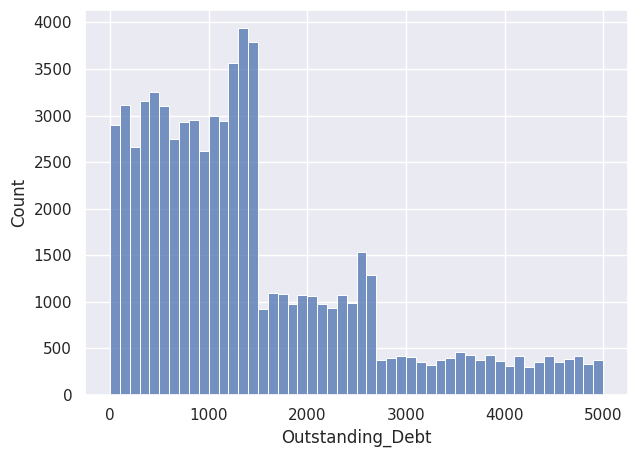

In [98]:
plt.figure(figsize = (7, 5))
sns.histplot(data = dataset2, x = 'Outstanding_Debt', bins = 50)
plt.show()

In [99]:
df_1 = dataset2[dataset2['Outstanding_Debt'] <= 1500]

In [100]:
df_2 = dataset2[dataset2['Outstanding_Debt'] <= 2700]
df_2 = df_2[df_2['Outstanding_Debt'] > 1500]

In [101]:
df_3 = dataset2[dataset2['Outstanding_Debt'] > 2700]

In [102]:
dataset2['Changed_Credit_Limit'].median()

9.43

In [103]:
df_1['Changed_Credit_Limit'].median()

8.4

In [104]:
df_2['Changed_Credit_Limit'].median()

10.41

In [105]:
df_3['Changed_Credit_Limit'].median()

20.61

In [106]:
df_1['Changed_Credit_Limit'].isnull().sum()

979

In [107]:
df_2['Changed_Credit_Limit'].isnull().sum()

284

In [108]:
df_3['Changed_Credit_Limit'].isnull().sum()

179

In [109]:
df_1['Changed_Credit_Limit'] = imputer.fit_transform(df_1[['Changed_Credit_Limit']])

In [110]:
df_2['Changed_Credit_Limit'] = imputer.fit_transform(df_2[['Changed_Credit_Limit']])

In [111]:
df_3['Changed_Credit_Limit'] = imputer.fit_transform(df_3[['Changed_Credit_Limit']])

In [112]:
dataset3 = pd.concat([df_1, df_2, df_3])

In [113]:
dataset3.shape

(68488, 47)

In [114]:
dataset3.corr(numeric_only = True)['Num_Credit_Inquiries'].sort_values(ascending = False)

Num_Credit_Inquiries         1.000000
Outstanding_Debt             0.014375
Payment_of_Min_Amount_Yes    0.013263
Delay_from_due_date          0.011988
spent_Low                    0.007782
Changed_Credit_Limit         0.007612
Annual_Income                0.007539
Month_July                   0.007292
Occupation_Media_Manager     0.006861
payments_Small               0.004781
Occupation_Entrepreneur      0.003822
Month_May                    0.003752
Occupation_Manager           0.003302
Num_of_Loan                  0.002806
Occupation_Journalist        0.002284
Month_June                   0.002108
Occupation_Mechanic          0.001663
Occupation_Developer         0.001597
Occupation_Doctor            0.001270
Occupation_Engineer          0.001184
Monthly_Balance              0.001067
Occupation_Writer            0.000621
Amount_invested_monthly      0.000574
Age                         -0.000256
Num_Bank_Accounts           -0.000525
Num_of_Delayed_Payment      -0.000685
Credit_Utili

In [115]:
dataset3['Num_Credit_Inquiries'] = imputer.fit_transform(dataset3[['Num_Credit_Inquiries']])

In [116]:
dataset3.corr(numeric_only = True)['Amount_invested_monthly'].sort_values(ascending = False)

Amount_invested_monthly      1.000000
Monthly_Inhand_Salary        0.057898
spent_Low                    0.026193
Credit_Mix_Good              0.023059
Payment_of_Min_Amount_No     0.019373
Credit_History_Age           0.019175
payments_Small               0.009301
Occupation_Engineer          0.007650
Credit_Utilization_Ratio     0.007133
Age                          0.007060
Occupation_Writer            0.005887
Month_March                  0.004983
Occupation_Architect         0.004656
Occupation_Teacher           0.002502
Month_May                    0.002438
Num_Credit_Card              0.002182
Num_Bank_Accounts            0.002163
Monthly_Balance              0.002021
Month_January                0.001307
Month_June                   0.001245
Month_August                 0.000588
Occupation_Doctor            0.000583
Num_Credit_Inquiries         0.000580
Occupation_Media_Manager    -0.000032
Occupation_Manager          -0.000047
Total_EMI_per_month         -0.000121
Month_July  

In [117]:
dataset3['Amount_invested_monthly'] = imputer.fit_transform(dataset3[['Amount_invested_monthly']])

In [118]:
dataset3.corr(numeric_only = True)['Monthly_Balance'].sort_values(ascending = False)

Monthly_Balance              1.000000
Delay_from_due_date          0.004336
payments_Medium              0.004301
Month_January                0.003872
Month_March                  0.003860
Month_June                   0.003855
Month_May                    0.003818
Month_August                 0.003813
Occupation_Architect         0.002760
Occupation_Scientist         0.002742
Occupation_Media_Manager     0.002730
Occupation_Teacher           0.002724
Occupation_Entrepreneur      0.002718
Occupation_Manager           0.002661
Occupation_Musician          0.002651
Occupation_Writer            0.002625
Amount_invested_monthly      0.002113
Payment_of_Min_Amount_Yes    0.001889
Total_EMI_per_month          0.001590
Payment_of_Min_Amount_No     0.001540
Interest_Rate                0.001377
Num_Credit_Card              0.001350
Monthly_Inhand_Salary        0.001210
Age                          0.001133
Num_Bank_Accounts            0.001132
Num_Credit_Inquiries         0.001044
Annual_Incom

In [119]:
dataset3['Monthly_Balance'] = imputer.fit_transform(dataset3[['Monthly_Balance']])

In [120]:
dataset3.apply(pd.isnull).sum()

ID                           0
Age                          0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Credit_History_Age           0
Total_EMI_per_month          0
Amount_invested_monthly      0
Monthly_Balance              0
Credit_Score                 0
Month_August                 0
Month_February               0
Month_January                0
Month_July                   0
Month_June                   0
Month_March                  0
Month_May                    0
Occupation_Architect         0
Occupation_Developer         0
Occupation_Doctor            0
Occupation_Engineer          0
Occupation_Entrepreneur      0
Occupation_Journalist        0
Occupati

In [121]:
dataset3.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,spent_Low,payments_Medium,payments_Small
count,68488.000000,6.848800e+04,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.00000,68488.000000,68488.000000,6.848800e+04,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000
mean,110.809514,1.781741e+05,4058.976459,16.878198,22.256381,74.629818,2.893762,21.079445,29.760454,10.410109,27.189099,1427.273712,32.277524,17.96982,1387.263606,613.477664,-3.406923e+22,0.123189,0.124547,0.126416,0.126781,0.125745,0.125818,0.123452,0.068669,0.066815,0.065340,0.068450,0.066610,0.065763,0.071151,0.064011,0.067442,0.067092,0.063588,0.067910,0.066712,0.062434,0.305178,0.457496,0.357333,0.522179,0.538503,0.341359,0.397252
std,686.811753,1.439906e+06,2972.337045,117.009609,127.844473,475.326435,62.178453,14.875220,218.423012,6.753019,191.033934,1156.871700,5.111107,7.91999,8232.069739,1995.345725,3.369780e+24,0.328657,0.330207,0.332320,0.332730,0.331564,0.331646,0.328958,0.252892,0.249703,0.247126,0.252518,0.249348,0.247870,0.257079,0.244775,0.250789,0.250183,0.244019,0.251593,0.249525,0.241944,0.460486,0.498194,0.479217,0.499511,0.498519,0.474169,0.489333
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.440000,0.000000,0.230000,20.000000,0.00000,0.000000,0.000000,-3.333333e+26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1.945342e+04,1794.505417,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.430000,3.000000,565.260000,28.052861,12.00000,30.519958,77.068589,2.704814e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,3.781397e+04,2921.305000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.380000,6.000000,1165.640000,32.281710,18.00000,69.494048,136.108242,3.364703e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,42.000000,7.312800e+04,5389.321667,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.770000,9.000000,1953.630000,36.490002,24.00000,162.030165,256.254334,4.681241e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


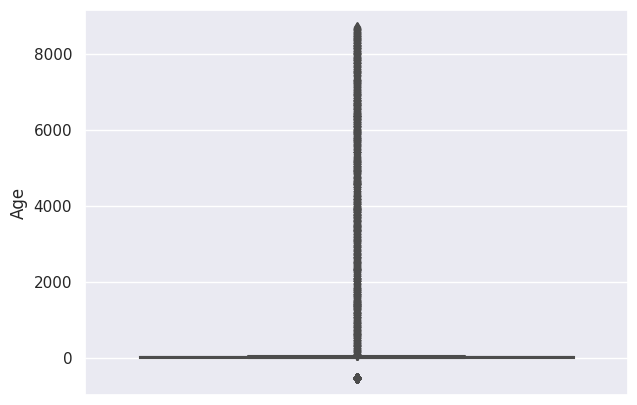

In [122]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset3, y = 'Age')
plt.show()

In [123]:
dataset3[dataset3['Age'] > 90]

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,spent_Low,payments_Medium,payments_Small
122,0x16b8,181.0,31993.780,2942.148333,6,6,7,2.0,8,14.0,10.28,1.0,818.22,27.380109,17,45.141298,264.257089,274.816447,Standard,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1
219,0x1749,995.0,43070.240,3622.186667,3,3,18,1.0,11,8.0,8.97,4.0,1233.10,24.331772,19,30.576085,74.920375,506.722207,Standard,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
301,0x17c3,7080.0,72559.360,6284.613333,4,5,17,-100.0,16,19.0,2.74,1.0,1173.70,38.080380,28,215.839171,172.962178,489.659985,Standard,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
570,0x1958,2657.0,30346.350,2651.862500,5,4,14,7.0,29,9.0,25.80,5.0,523.56,38.949629,8,96.721280,106.299227,342.165743,Standard,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0
1275,0x1d79,6452.0,7512.225,513.018750,7,7,14,5.0,6,16.0,11.87,9.0,540.07,29.159994,8,56074.000000,42.597955,278.017812,Standard,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95268,0x24436,6964.0,18967.130,1729.594167,6,776,25,9.0,58,16.0,9.80,163.0,3213.09,30.689683,0,74.220597,81.643431,277.095389,Poor,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
95902,0x247ec,4592.0,19797.220,2742.400833,6,7,27,9.0,55,18.0,20.48,7.0,4986.03,39.031752,3,92.603971,37.217820,313.055042,Standard,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
96381,0x24abb,6117.0,35239.540,2807.628333,9,6,16,9.0,25,23.0,22.75,9.0,3210.75,38.789567,18,199.712775,158.203698,212.846360,Standard,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
96689,0x24c8b,8052.0,16511.620,2742.400833,7,9,32,8.0,47,25.0,23.88,11.0,4821.28,24.679694,18,105.446162,111.991303,198.859369,Standard,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0


In [124]:
dataset3[dataset3['Age'] <= 0]

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,spent_Low,payments_Medium,payments_Small
113,0x16ab,-500.0,25546.26,2742.400833,8,7,14,5.0,16,13.0,7.83,6.0,758.44,29.711376,18,101.328637,300.323232,129.933631,Standard,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
340,0x17fe,-500.0,20574.47,1740.539167,6,1327,14,4.0,6,7.0,13.74,11.0,749.95,29.036164,11,49.348666,139.978562,254.726688,Standard,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
993,0x1bd3,-500.0,63536.98,5382.748333,4,5,12,2.0,33,14.0,14.78,4.0,89.62,35.395978,30,69.100853,36.732412,672.441569,Standard,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1466,0x1e98,-500.0,19078.93,1304.910833,5,7,20,0.0,19,15.0,19.34,4.0,265.86,29.632146,18,0.000000,68.526556,351.964527,Standard,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
2215,0x22f9,-500.0,108415.00,8848.583333,3,5,16,1.0,14,20.0,16.33,6.0,1075.84,32.822704,18,76.857563,413.806421,654.194349,Good,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95054,0x242f4,-500.0,55596.12,4463.010000,10,6,2782,5.0,33,25.0,4.45,10.0,4331.18,28.280150,4,202.392912,503.953849,29.954239,Standard,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
95782,0x24738,-500.0,42527.04,3374.920000,8,6,22,7.0,24,21.0,18.90,15.0,4193.78,24.867234,10,61531.000000,321.801704,75.421362,Poor,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
97190,0x24f78,-500.0,63675.84,2742.400833,10,9,24,8.0,16,23.0,15.09,13.0,3841.48,33.819147,7,242.195303,96.299301,431.137396,Standard,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
98139,0x25509,-500.0,80906.36,6990.196667,7,7,23,6.0,42,16.0,5.43,9.0,4841.43,25.302523,8,403.484877,113.149888,432.384901,Poor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [125]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68488 entries, 33 to 99991
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         68488 non-null  object 
 1   Age                        68488 non-null  float64
 2   Annual_Income              68488 non-null  float64
 3   Monthly_Inhand_Salary      68488 non-null  float64
 4   Num_Bank_Accounts          68488 non-null  int64  
 5   Num_Credit_Card            68488 non-null  int64  
 6   Interest_Rate              68488 non-null  int64  
 7   Num_of_Loan                68488 non-null  float64
 8   Delay_from_due_date        68488 non-null  int64  
 9   Num_of_Delayed_Payment     68488 non-null  float64
 10  Changed_Credit_Limit       68488 non-null  float64
 11  Num_Credit_Inquiries       68488 non-null  float64
 12  Outstanding_Debt           68488 non-null  float64
 13  Credit_Utilization_Ratio   68488 non-null  float64

In [126]:
df_1 = dataset3[dataset3['Age'] <= 90]

In [127]:
df_2 = df_1[df_1['Age'] > 0]

In [128]:
def age_column(text):
    if text < 0 or text >= 90:
        text = np.nan
    return text

In [129]:
dataset3['Age'] = dataset3['Age'].apply(age_column)

In [130]:
dataset3['Age'].isnull().sum()

1889

In [131]:
dataset3.corr(numeric_only = True)['Age'].sort_values(ascending = False)

Age                          1.000000
Payment_of_Min_Amount_No     0.242654
Credit_History_Age           0.224188
Credit_Mix_Good              0.214837
Monthly_Inhand_Salary        0.092172
Credit_Utilization_Ratio     0.025422
Occupation_Journalist        0.015823
Occupation_Lawyer            0.014723
Month_August                 0.011498
payments_Medium              0.011329
Occupation_Musician          0.008125
Month_July                   0.007678
Occupation_Mechanic          0.006550
Annual_Income                0.006517
Month_June                   0.003573
Amount_invested_monthly      0.002795
Occupation_Architect         0.002442
Month_May                    0.002364
Occupation_Scientist         0.002144
Occupation_Developer         0.000966
Total_EMI_per_month          0.000058
Num_of_Delayed_Payment      -0.000321
Monthly_Balance             -0.001062
Occupation_Entrepreneur     -0.001290
Occupation_Writer           -0.001837
Num_Bank_Accounts           -0.001933
Num_Credit_C

In [132]:
dataset3['Age'].mean()

33.31212180363069

In [133]:
dataset3['Age'].median()

33.0

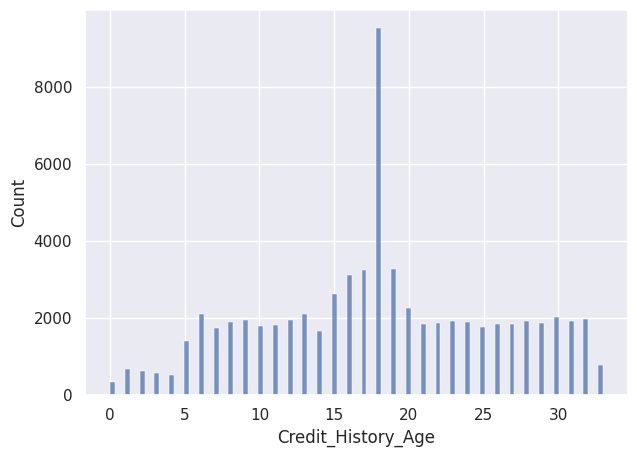

In [134]:
plt.figure(figsize = (7, 5))
sns.histplot(data = dataset3, x = 'Credit_History_Age', bins = 100)
plt.show()

In [135]:
df_1 = dataset3[dataset3['Credit_History_Age'] <= 10]

In [136]:
df_2 = dataset3[dataset3['Credit_History_Age'] > 10]
df_2 = df_2[df_2['Credit_History_Age'] <= 20]

In [137]:
df_3 = dataset3[dataset3['Credit_History_Age'] > 20]

In [138]:
df_1['Age'].isnull().sum()

391

In [139]:
df_2['Age'].isnull().sum()

847

In [140]:
df_3['Age'].isnull().sum()

651

In [141]:
df_1['Age'].median()

30.0

In [142]:
df_2['Age'].median()

32.0

In [143]:
df_3['Age'].median()

36.0

In [144]:
df_1['Age'] = imputer.fit_transform(df_1[['Age']])

In [145]:
df_2['Age'] = imputer.fit_transform(df_2[['Age']])

In [146]:
df_3['Age'] = imputer.fit_transform(df_3[['Age']])

In [147]:
dataset4 = pd.concat([df_1, df_2, df_3])

In [148]:
dataset4.shape

(68488, 47)

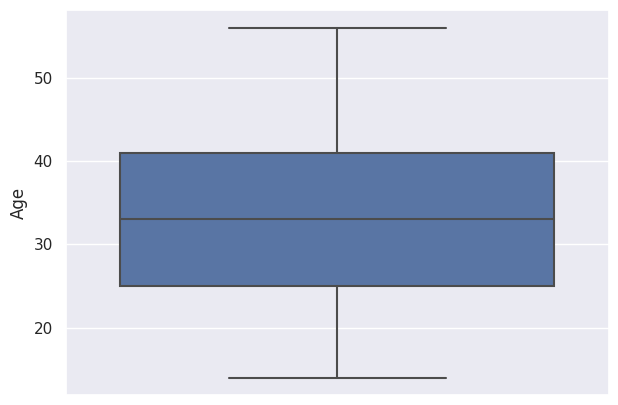

In [149]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Age')
plt.show()

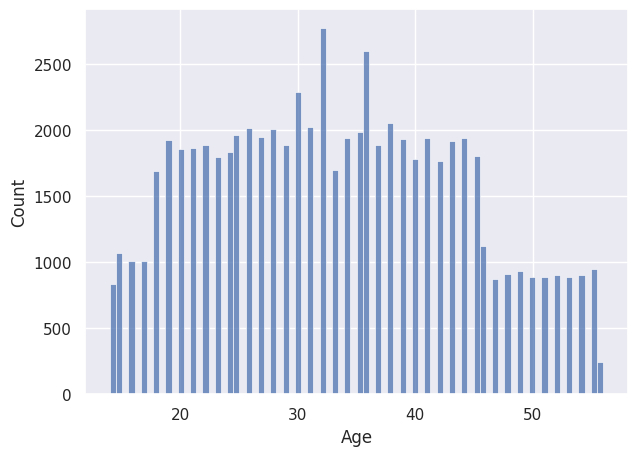

In [150]:
plt.figure(figsize = (7, 5))
sns.histplot(data = dataset4, x = 'Age', bins = 80)
plt.show()

In [151]:
dataset4.head()

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,spent_Low,payments_Medium,payments_Small
136,0x16ce,45.0,32284.62,2898.385,6,7,17,6.0,11,12.0,9.22,8.0,1283.37,28.940893,6,103.03756,254.861615,211.939325,Standard,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0
137,0x16cf,46.0,32284.62,2898.385,6,7,17,6.0,11,12.0,9.22,8.0,1283.37,27.861310,6,103.03756,103.210307,353.590632,Standard,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0
138,0x16d0,46.0,32284.62,2898.385,6,7,17,6.0,10,12.0,9.22,8.0,1283.37,27.881697,6,103.03756,35.793568,391.007371,Standard,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
139,0x16d1,46.0,32284.62,2898.385,6,7,17,6.0,11,12.0,9.22,8.0,1283.37,38.394558,6,103.03756,280.218254,196.582686,Standard,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1
141,0x16d3,46.0,32284.62,2898.385,6,7,17,6.0,11,12.0,8.22,10.0,1283.37,26.874467,6,103.03756,272.273550,204.527390,Standard,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1


In [152]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68488 entries, 136 to 99998
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         68488 non-null  object 
 1   Age                        68488 non-null  float64
 2   Annual_Income              68488 non-null  float64
 3   Monthly_Inhand_Salary      68488 non-null  float64
 4   Num_Bank_Accounts          68488 non-null  int64  
 5   Num_Credit_Card            68488 non-null  int64  
 6   Interest_Rate              68488 non-null  int64  
 7   Num_of_Loan                68488 non-null  float64
 8   Delay_from_due_date        68488 non-null  int64  
 9   Num_of_Delayed_Payment     68488 non-null  float64
 10  Changed_Credit_Limit       68488 non-null  float64
 11  Num_Credit_Inquiries       68488 non-null  float64
 12  Outstanding_Debt           68488 non-null  float64
 13  Credit_Utilization_Ratio   68488 non-null  float6

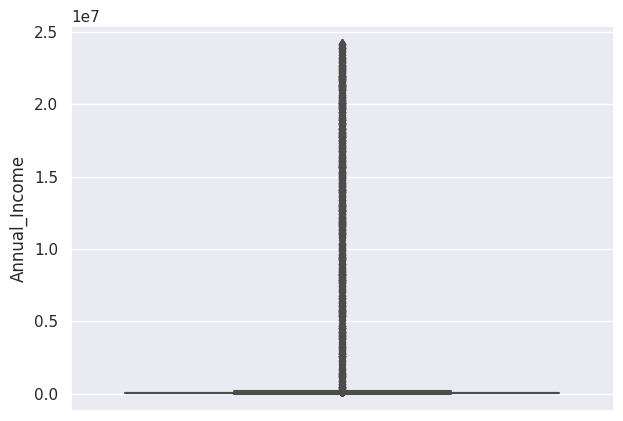

In [153]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Annual_Income')
plt.show()

In [154]:
dataset4[dataset4['Annual_Income'] > 300000].shape

(682, 47)

In [155]:
dataset4 = dataset4[dataset4['Annual_Income'] < 300000]

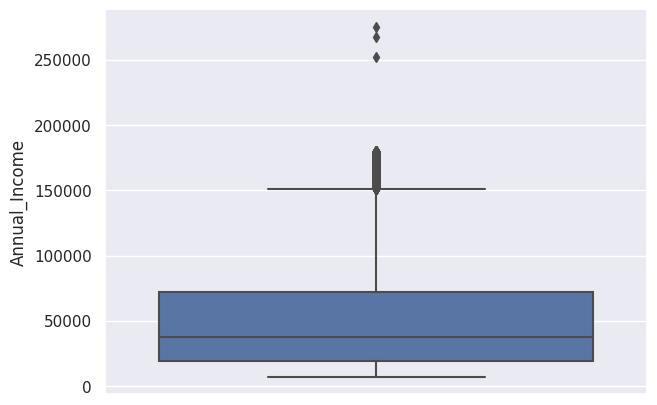

In [156]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Annual_Income')
plt.show()

In [157]:
dataset4[dataset4['Annual_Income'] > 150000].shape

(1371, 47)

In [158]:
dataset4 = dataset4[dataset4['Annual_Income'] < 150000]

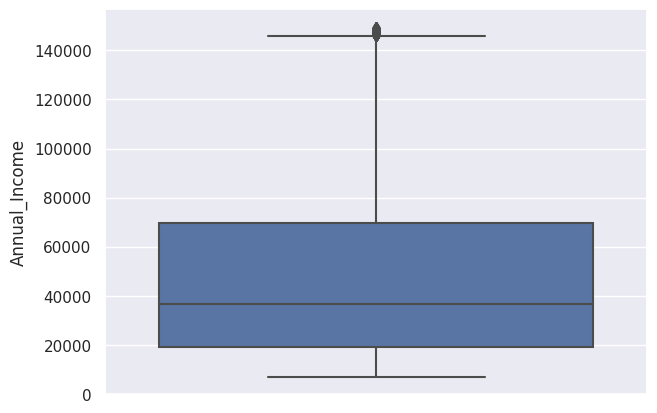

In [159]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Annual_Income')
plt.show()

In [160]:
dataset4[dataset4['Annual_Income'] > 145000].shape

(300, 47)

In [161]:
dataset4 = dataset4[dataset4['Annual_Income'] < 1450000]

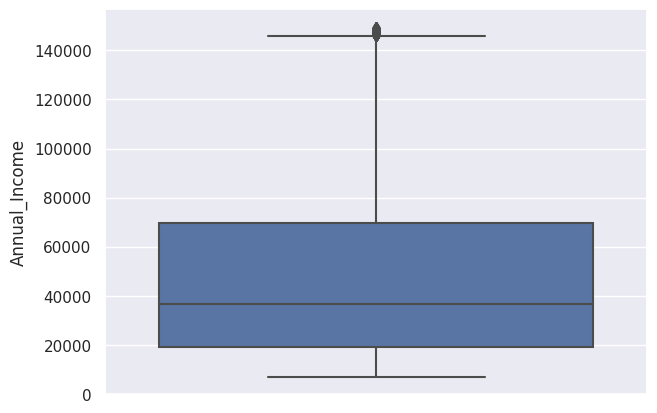

In [162]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Annual_Income')
plt.show()

In [163]:
dataset4[dataset4['Annual_Income'] > 140000].shape

(890, 47)

In [164]:
dataset4 = dataset4[dataset4['Annual_Income'] < 140000]

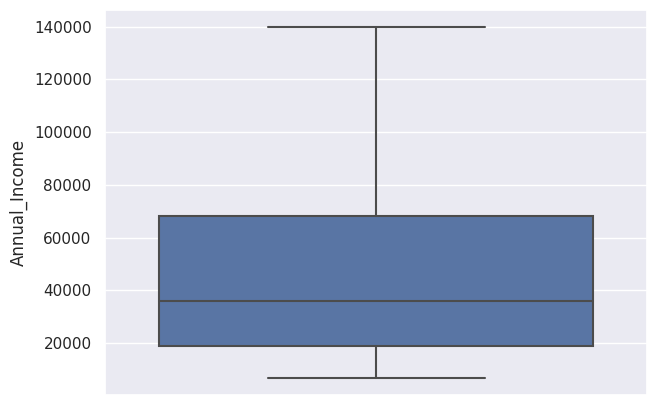

In [165]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Annual_Income')
plt.show()

In [166]:
dataset4.shape

(65545, 47)

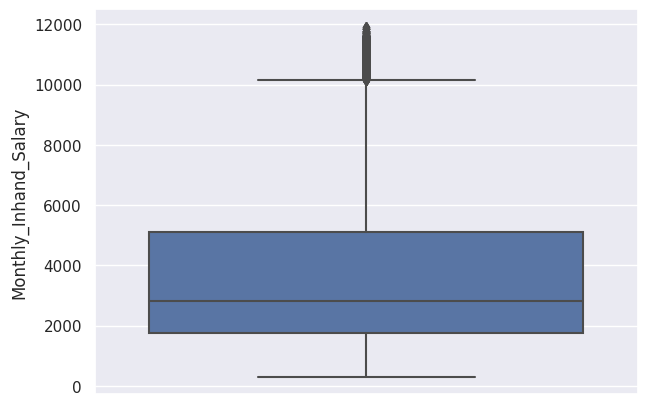

In [167]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Monthly_Inhand_Salary')
plt.show()

In [168]:
dataset4[dataset4['Monthly_Inhand_Salary'] > 10000].shape

(2361, 47)

In [169]:
dataset4 = dataset4[dataset4['Monthly_Inhand_Salary'] < 10000]

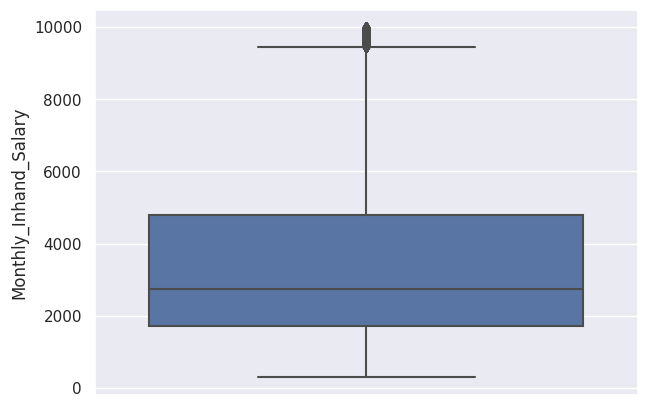

In [170]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Monthly_Inhand_Salary')
plt.show()

In [171]:
dataset4[dataset4['Monthly_Inhand_Salary'] > 9000].shape

(1769, 47)

In [172]:
dataset4 = dataset4[dataset4['Monthly_Inhand_Salary'] < 9000]

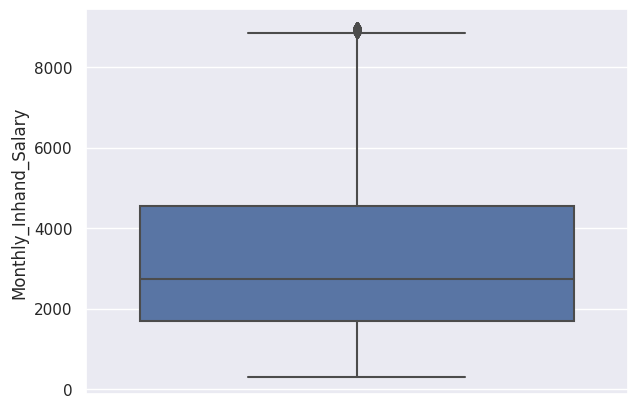

In [173]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Monthly_Inhand_Salary')
plt.show()

In [174]:
dataset4[dataset4['Monthly_Inhand_Salary'] > 8700].shape

(528, 47)

In [175]:
dataset4 = dataset4[dataset4['Monthly_Inhand_Salary'] < 8700]

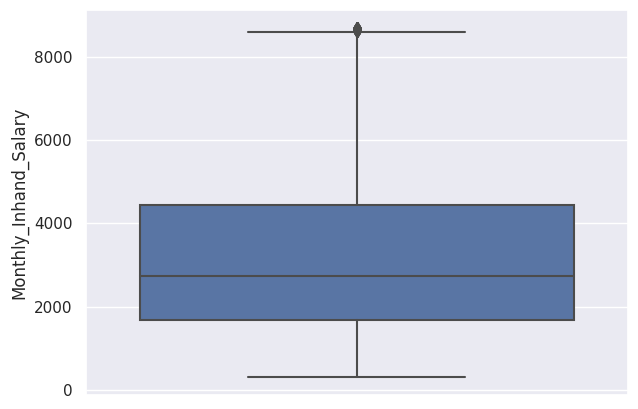

In [176]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Monthly_Inhand_Salary')
plt.show()

In [177]:
dataset4.shape

(60887, 47)

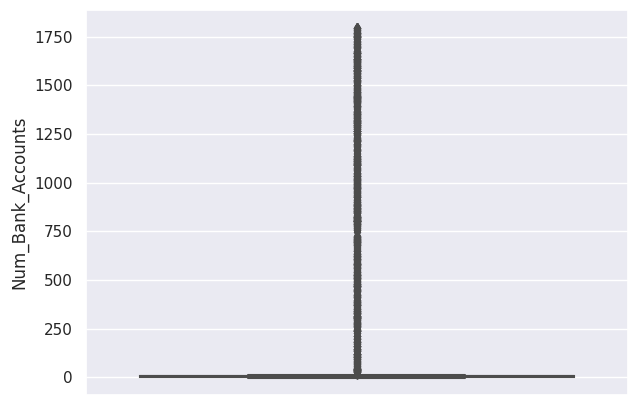

In [178]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Num_Bank_Accounts')
plt.show()

In [179]:
dataset4[dataset4['Num_Bank_Accounts'] > 10].shape

(780, 47)

In [180]:
dataset4 = dataset4[dataset4['Num_Bank_Accounts'] < 10]

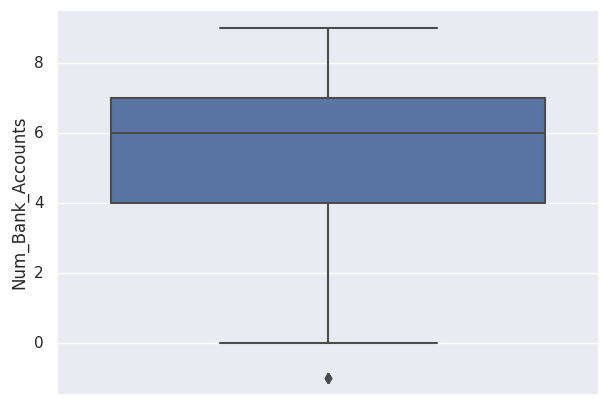

In [181]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Num_Bank_Accounts')
plt.show()

In [182]:
dataset4[dataset4['Num_Bank_Accounts'] < 0].shape

(5, 47)

In [183]:
dataset4 = dataset4[dataset4['Num_Bank_Accounts'] > 0]

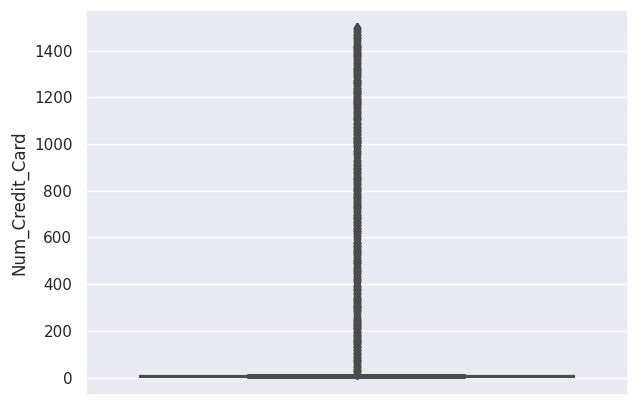

In [184]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Num_Credit_Card')
plt.show()

In [185]:
dataset4[dataset4['Num_Credit_Card'] > 10].shape

(1237, 47)

In [186]:
dataset4 = dataset4[dataset4['Num_Credit_Card'] < 10]

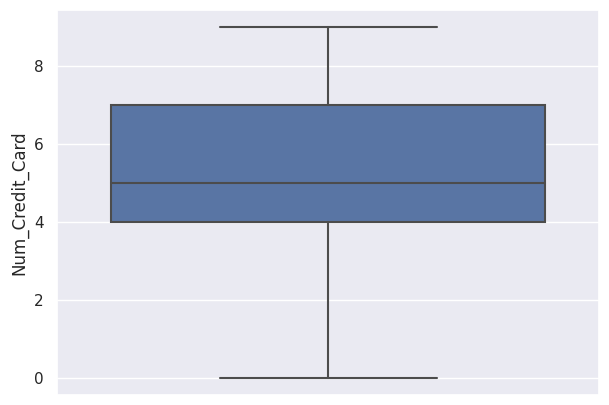

In [187]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Num_Credit_Card')
plt.show()

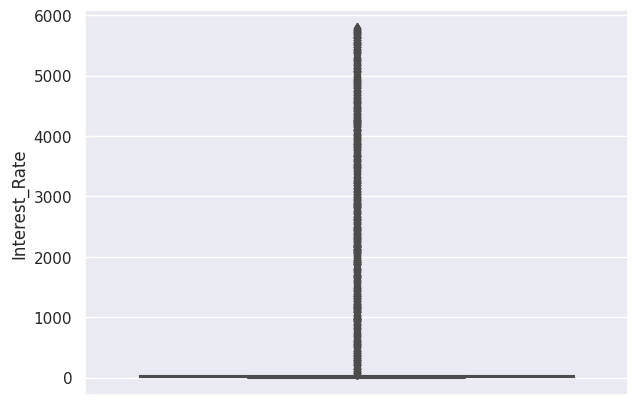

In [188]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Interest_Rate')
plt.show()

In [189]:
dataset4[dataset4['Interest_Rate'] > 40].shape

(1049, 47)

In [190]:
dataset4 = dataset4[dataset4['Interest_Rate'] < 40]

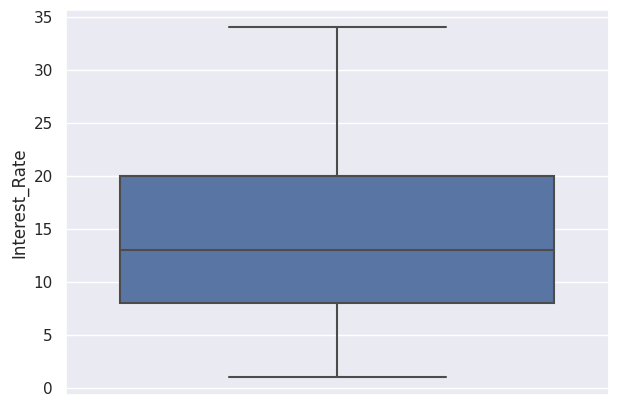

In [191]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Interest_Rate')
plt.show()

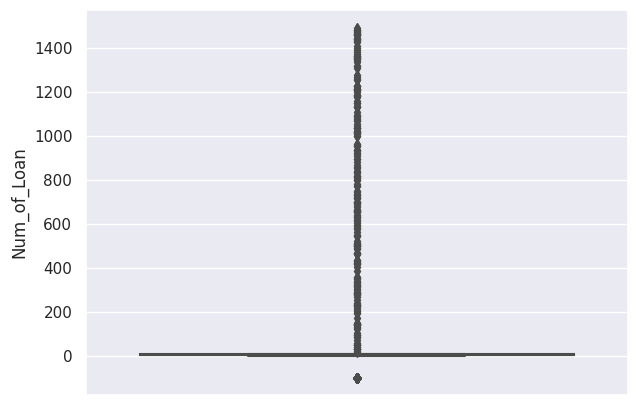

In [192]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Num_of_Loan')
plt.show()

In [193]:
dataset4[dataset4['Num_of_Loan'] > 10].shape

(223, 47)

In [194]:
dataset4 = dataset4[dataset4['Num_of_Loan'] < 10]

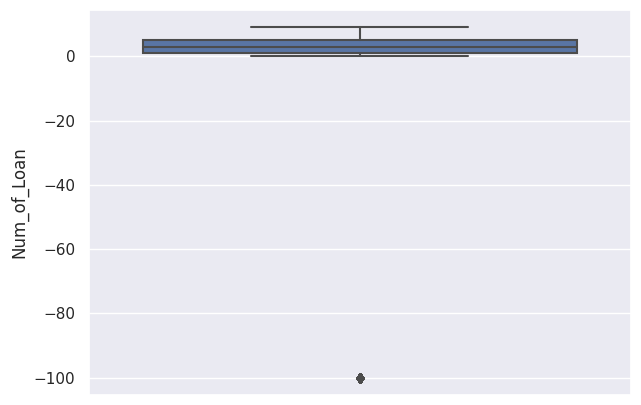

In [195]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Num_of_Loan')
plt.show()

In [196]:
dataset4[dataset4['Num_of_Loan'] < 0].shape

(1904, 47)

In [197]:
dataset4 = dataset4[dataset4['Num_of_Loan'] > 0]

In [198]:
dataset4.shape

(41955, 47)

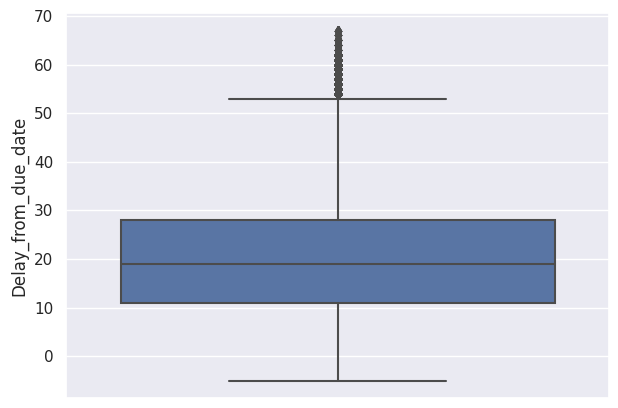

In [199]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Delay_from_due_date')
plt.show()

In [200]:
dataset4[dataset4['Delay_from_due_date'] > 52].shape

(2396, 47)

In [201]:
dataset4 = dataset4[dataset4['Delay_from_due_date'] < 52]

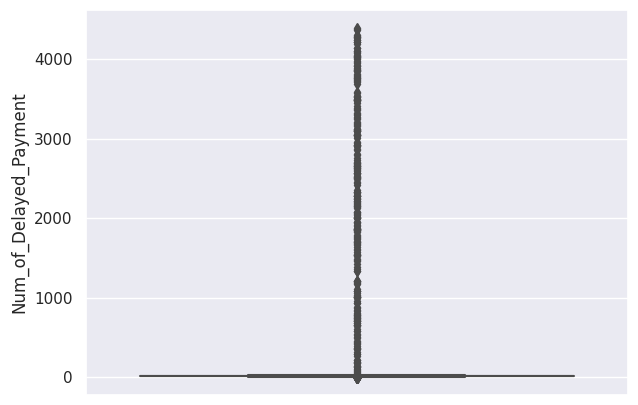

In [202]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Num_of_Delayed_Payment')
plt.show()

In [203]:
dataset4[dataset4['Num_of_Delayed_Payment'] > 25].shape

(519, 47)

In [204]:
dataset4 = dataset4[dataset4['Num_of_Delayed_Payment'] < 25]

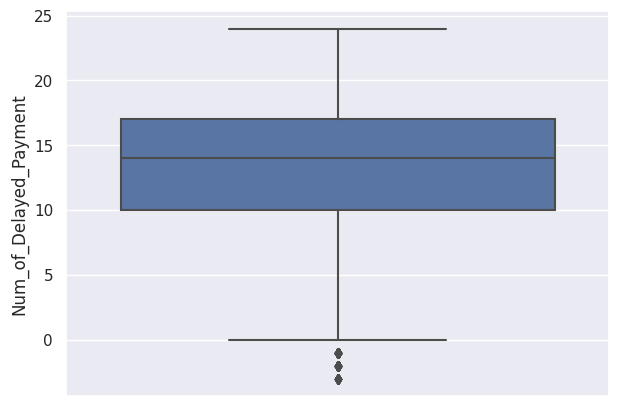

In [205]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Num_of_Delayed_Payment')
plt.show()

In [206]:
dataset4[dataset4['Num_of_Delayed_Payment'] < 0].shape

(185, 47)

In [207]:
dataset4 = dataset4[dataset4['Num_of_Delayed_Payment'] > 0]

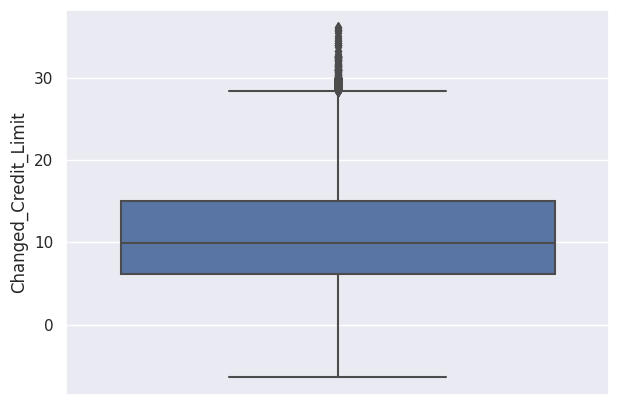

In [208]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Changed_Credit_Limit')
plt.show()

In [209]:
dataset4[dataset4['Changed_Credit_Limit'] > 27].shape

(627, 47)

In [210]:
dataset4 = dataset4[dataset4['Changed_Credit_Limit'] < 27]

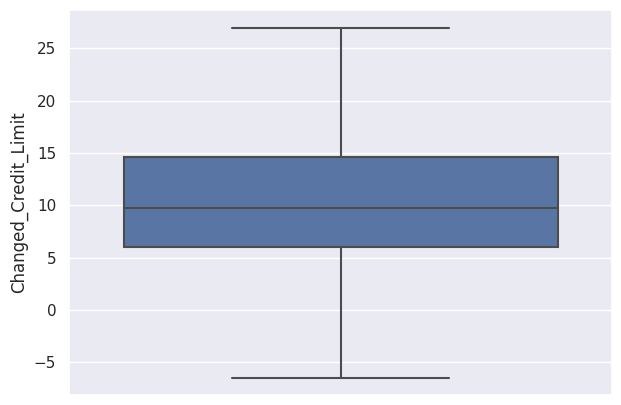

In [211]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Changed_Credit_Limit')
plt.show()

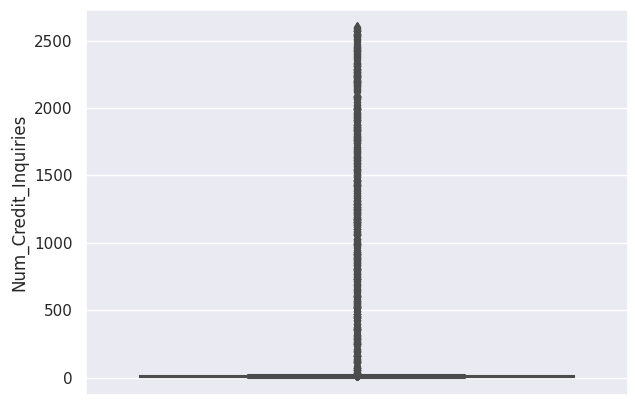

In [212]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Num_Credit_Inquiries')
plt.show()

In [213]:
dataset4[dataset4['Num_Credit_Inquiries'] > 20].shape

(608, 47)

In [214]:
dataset4 = dataset4[dataset4['Num_Credit_Inquiries'] < 20]

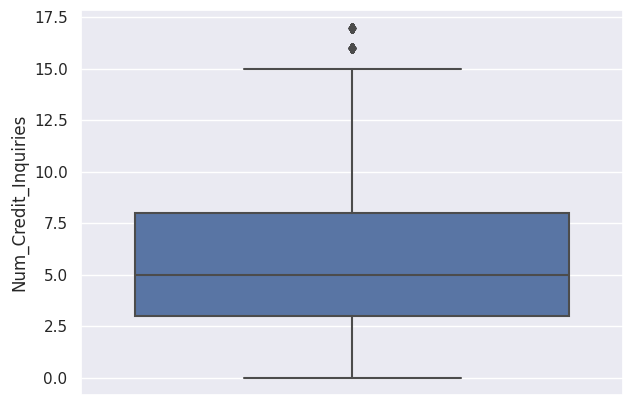

In [215]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Num_Credit_Inquiries')
plt.show()

In [216]:
dataset4[dataset4['Num_Credit_Inquiries'] > 15].shape

(181, 47)

In [217]:
dataset4 = dataset4[dataset4['Num_Credit_Inquiries'] < 15]

In [218]:
dataset4.shape

(35885, 47)

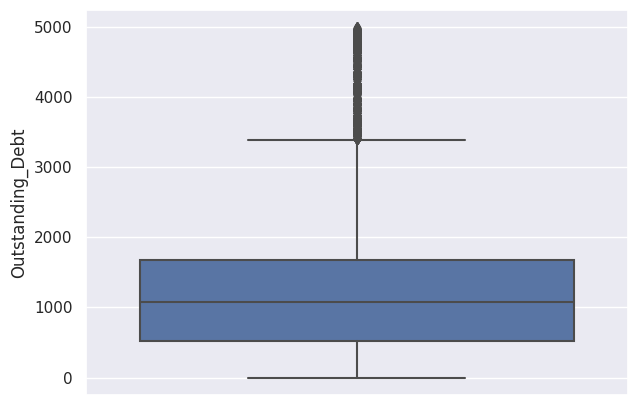

In [219]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Outstanding_Debt')
plt.show()

In [220]:
dataset4[dataset4['Outstanding_Debt'] > 3200].shape

(2226, 47)

In [221]:
dataset4 = dataset4[dataset4['Outstanding_Debt'] < 3200]

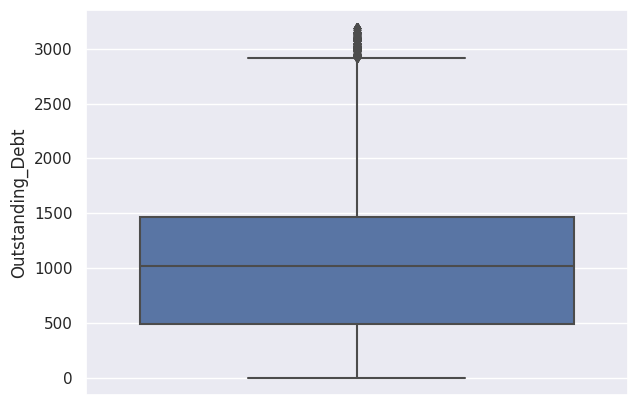

In [222]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Outstanding_Debt')
plt.show()

In [223]:
dataset4[dataset4['Outstanding_Debt'] > 2800].shape

(538, 47)

In [224]:
dataset4 = dataset4[dataset4['Outstanding_Debt'] < 2800]

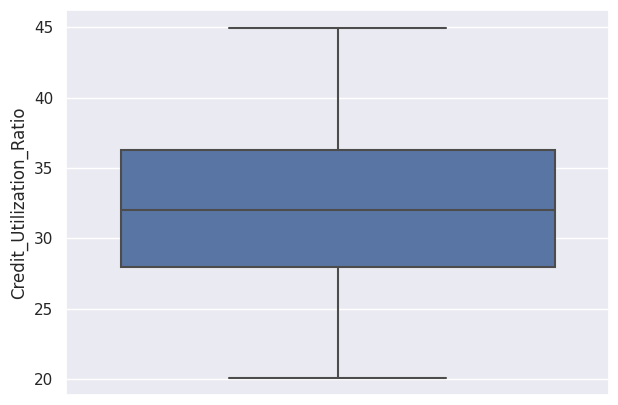

In [225]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Credit_Utilization_Ratio')
plt.show()

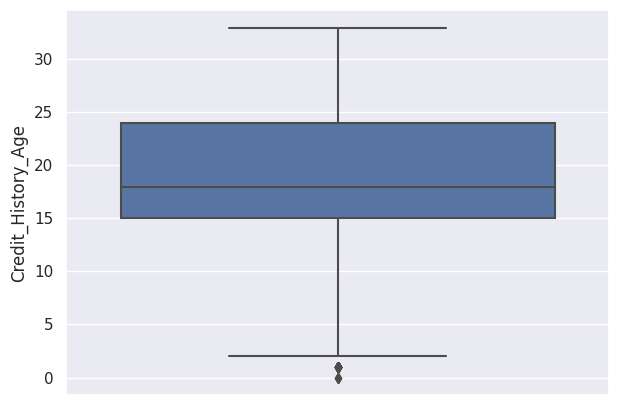

In [226]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Credit_History_Age')
plt.show()

In [227]:
dataset4[dataset4['Credit_History_Age'] < 3].shape

(60, 47)

In [228]:
dataset4 = dataset4[dataset4['Credit_History_Age'] > 3]

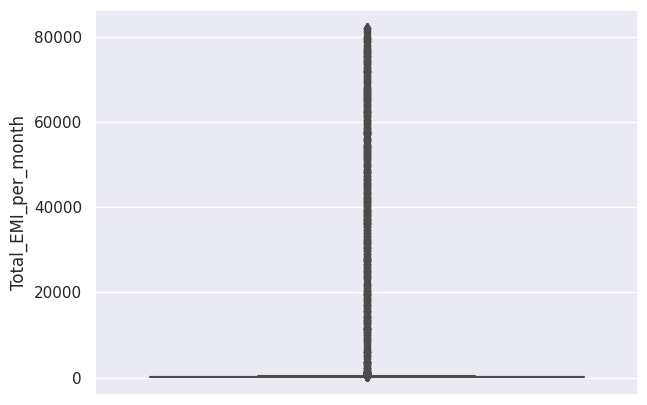

In [229]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Total_EMI_per_month')
plt.show()

In [230]:
dataset4[dataset4['Total_EMI_per_month'] > 10000].shape

(930, 47)

In [231]:
dataset4 = dataset4[dataset4['Total_EMI_per_month'] < 10000]

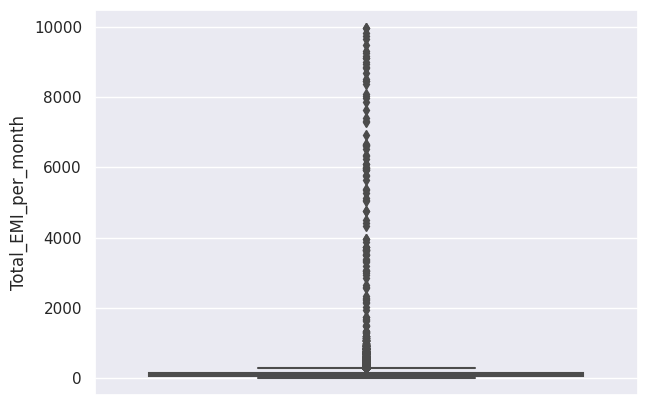

In [232]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Total_EMI_per_month')
plt.show()

In [233]:
dataset4[dataset4['Total_EMI_per_month'] > 1000].shape

(137, 47)

In [234]:
dataset4 = dataset4[dataset4['Total_EMI_per_month'] < 1000]

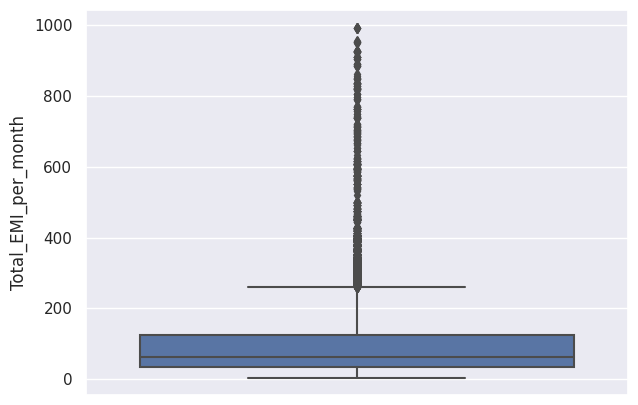

In [235]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Total_EMI_per_month')
plt.show()

In [236]:
dataset4[dataset4['Total_EMI_per_month'] > 240].shape

(2169, 47)

In [237]:
dataset4 = dataset4[dataset4['Total_EMI_per_month'] < 240]

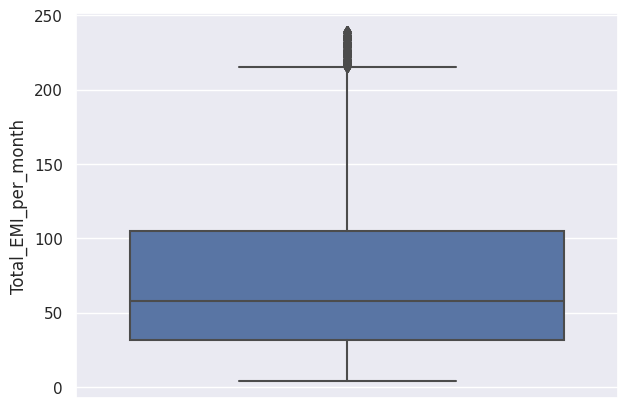

In [238]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Total_EMI_per_month')
plt.show()

In [239]:
dataset4[dataset4['Total_EMI_per_month'] > 210].shape

(972, 47)

In [240]:
dataset4 = dataset4[dataset4['Total_EMI_per_month'] < 210]

In [241]:
dataset4.shape

(28821, 47)

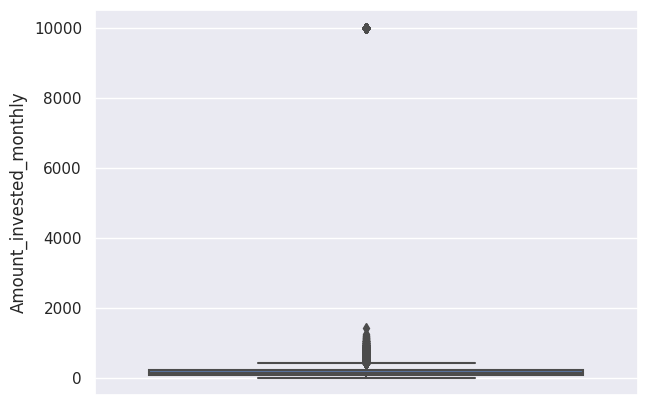

In [242]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Amount_invested_monthly')
plt.show()

In [243]:
dataset4[dataset4['Amount_invested_monthly'] > 500].shape

(2310, 47)

In [244]:
dataset4 = dataset4[dataset4['Amount_invested_monthly'] < 500]

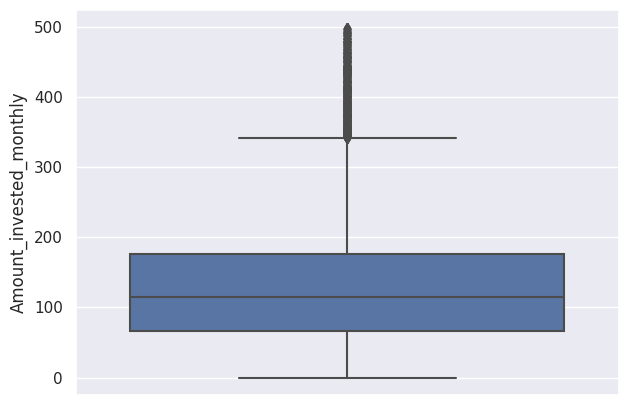

In [245]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Amount_invested_monthly')
plt.show()

In [246]:
dataset4[dataset4['Amount_invested_monthly'] > 310].shape

(2000, 47)

In [247]:
dataset4 = dataset4[dataset4['Amount_invested_monthly'] < 310]

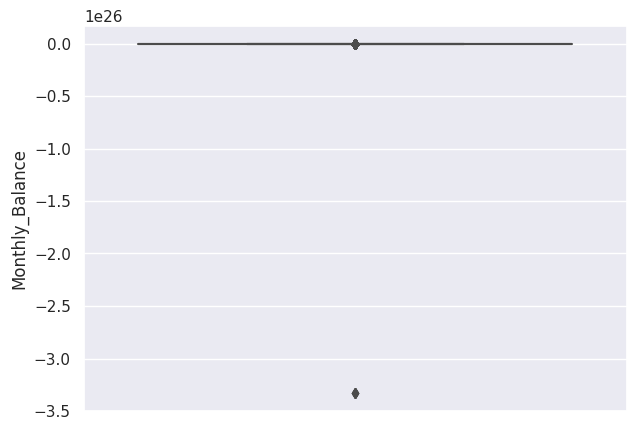

In [248]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Monthly_Balance')
plt.show()

In [249]:
dataset4[dataset4['Monthly_Balance'] > 700].shape

(1146, 47)

In [250]:
dataset4 = dataset4[dataset4['Monthly_Balance'] < 700]

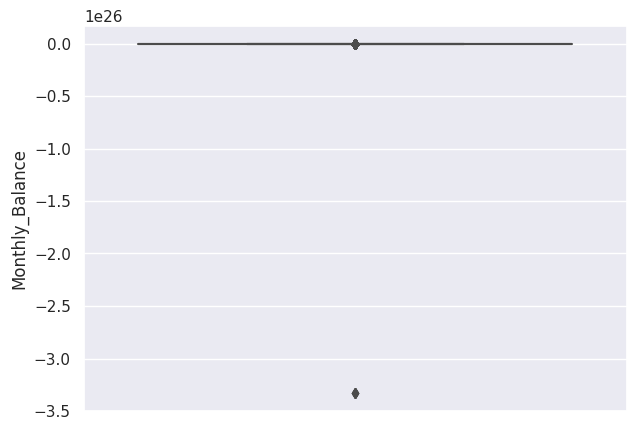

In [251]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Monthly_Balance')
plt.show()

In [252]:
dataset4['Monthly_Balance'].mean()

-5.706541122761966e+22

In [253]:
dataset4[dataset4['Monthly_Balance'] < 0].shape

(4, 47)

In [254]:
dataset4.shape

(23365, 47)

In [255]:
dataset4['Monthly_Balance'].median()

330.401639078553

In [256]:
dataset4[dataset4['Monthly_Balance'] > 600].shape

(1155, 47)

In [257]:
dataset4 = dataset4[dataset4['Monthly_Balance'] < 600]

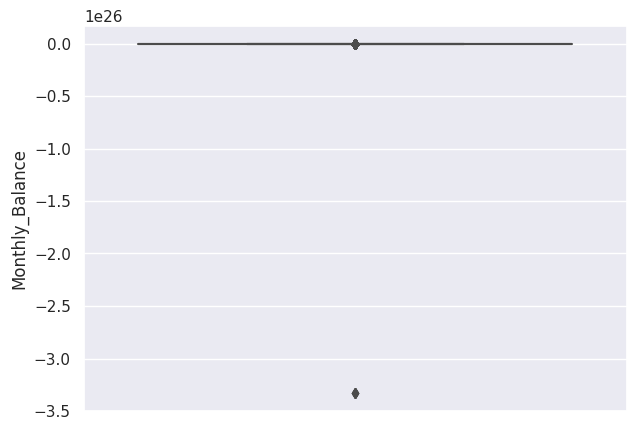

In [258]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Monthly_Balance')
plt.show()

In [259]:
dataset4[dataset4['Monthly_Balance'] == 10].shape

(0, 47)

In [260]:
q1 = dataset4['Monthly_Balance'].quantile(0.01)

In [261]:
q1

175.6186538709041

In [262]:
q3 = dataset4['Monthly_Balance'].quantile(0.99)

In [263]:
q3

584.3903979695287

In [264]:
dataset4[dataset4['Monthly_Balance'] < 175].shape

(214, 47)

In [265]:
dataset4[dataset4['Monthly_Balance'] > 584].shape

(228, 47)

In [266]:
dataset4 = dataset4[dataset4['Monthly_Balance'] > 175]

In [267]:
dataset4 = dataset4[dataset4['Monthly_Balance'] < 584]

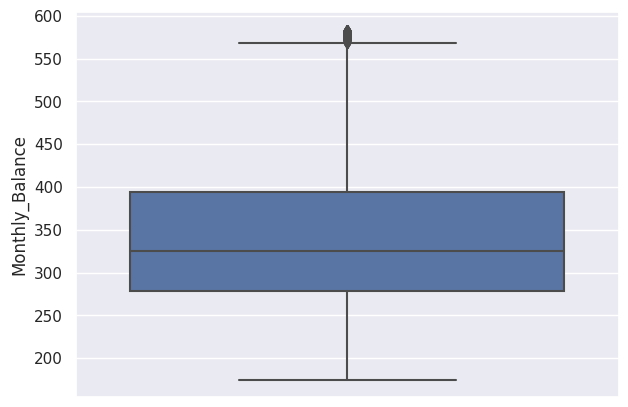

In [268]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset4, y = 'Monthly_Balance')
plt.show()

In [269]:
dataset4[dataset4['Monthly_Balance'] > 560].shape

(366, 47)

In [270]:
dataset4 = dataset4[dataset4['Monthly_Balance'] < 560]

In [271]:
dataset4.shape

(21402, 47)

In [272]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21402 entries, 136 to 99998
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         21402 non-null  object 
 1   Age                        21402 non-null  float64
 2   Annual_Income              21402 non-null  float64
 3   Monthly_Inhand_Salary      21402 non-null  float64
 4   Num_Bank_Accounts          21402 non-null  int64  
 5   Num_Credit_Card            21402 non-null  int64  
 6   Interest_Rate              21402 non-null  int64  
 7   Num_of_Loan                21402 non-null  float64
 8   Delay_from_due_date        21402 non-null  int64  
 9   Num_of_Delayed_Payment     21402 non-null  float64
 10  Changed_Credit_Limit       21402 non-null  float64
 11  Num_Credit_Inquiries       21402 non-null  float64
 12  Outstanding_Debt           21402 non-null  float64
 13  Credit_Utilization_Ratio   21402 non-null  float6

In [273]:
cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

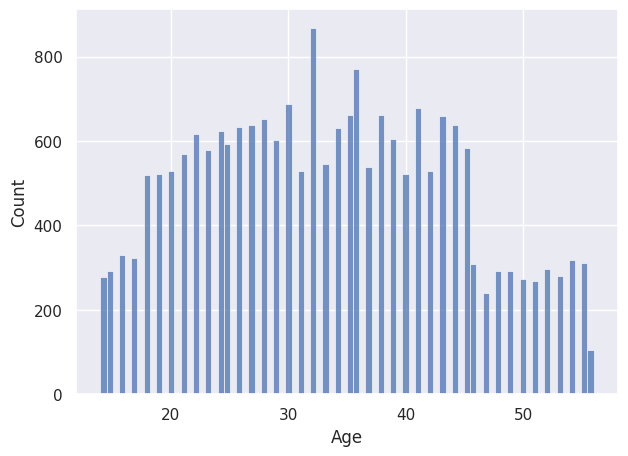

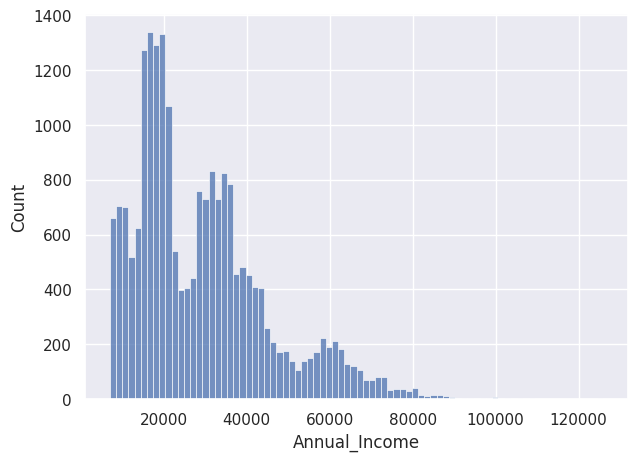

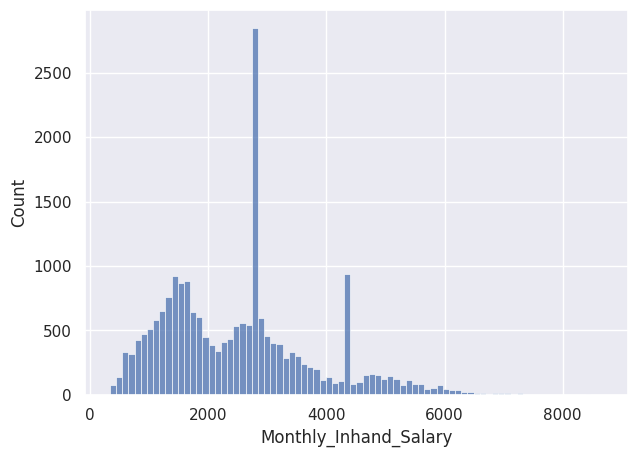

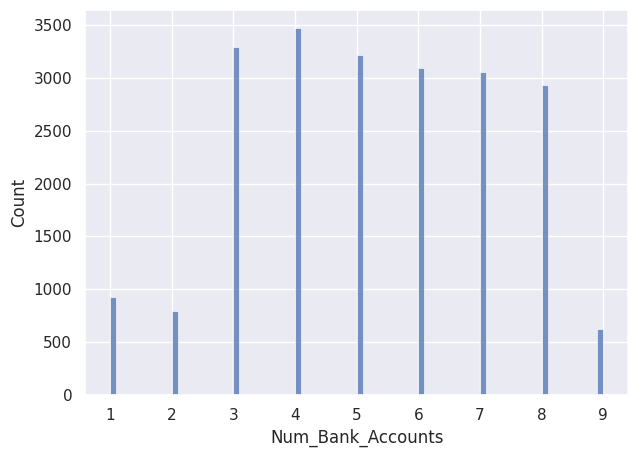

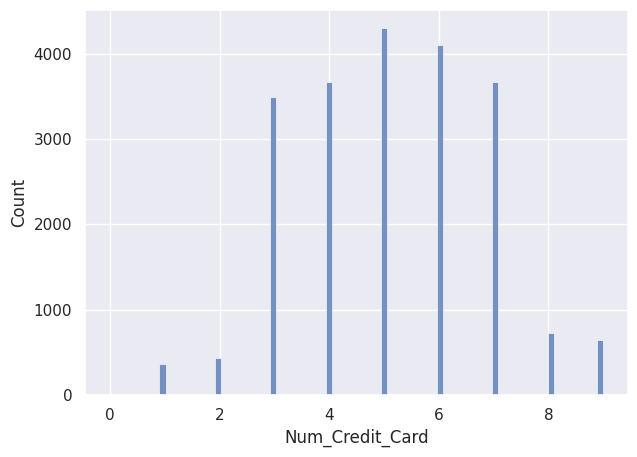

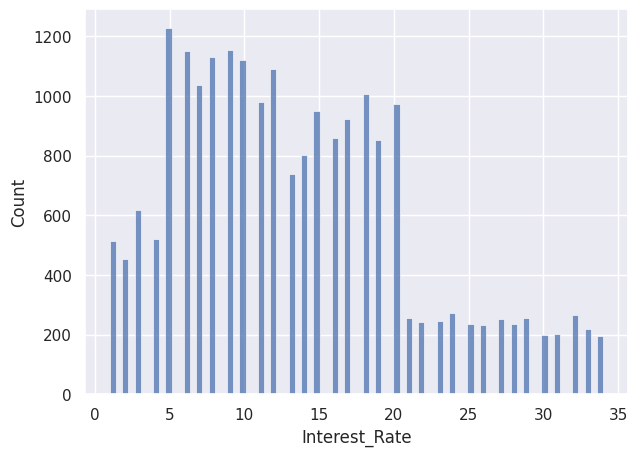

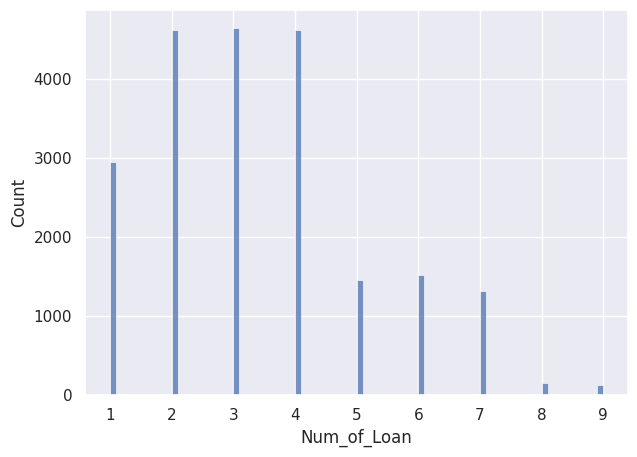

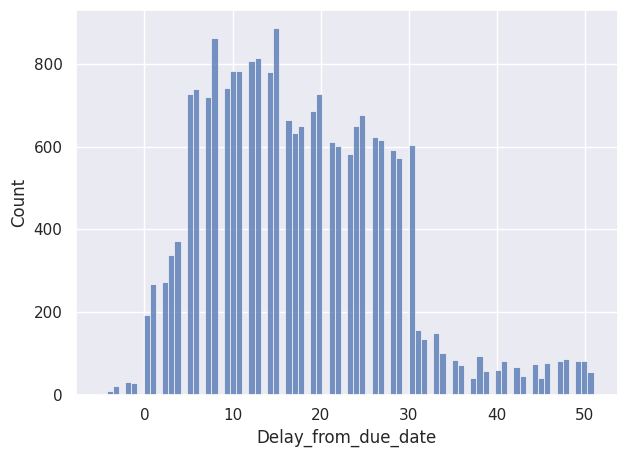

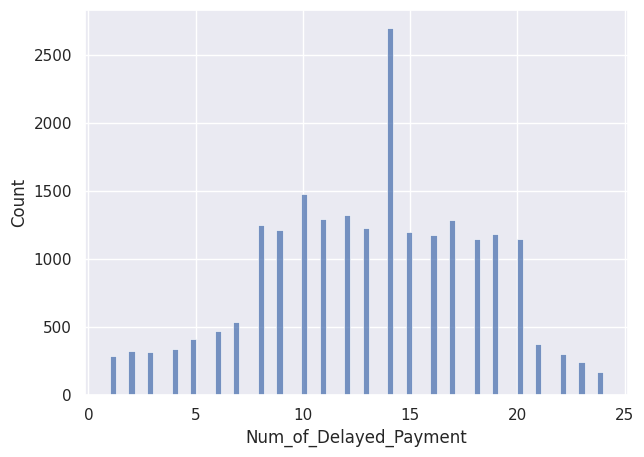

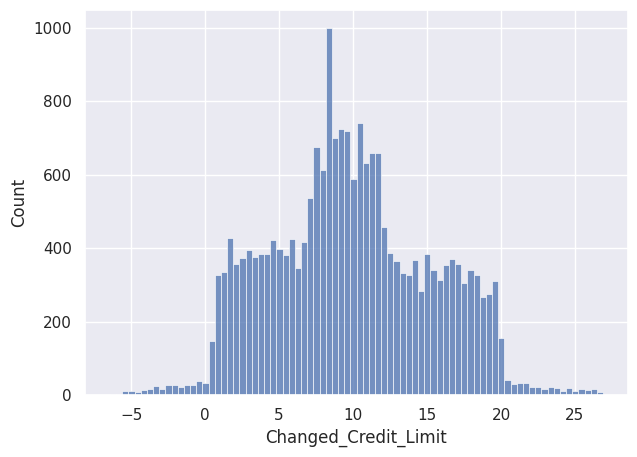

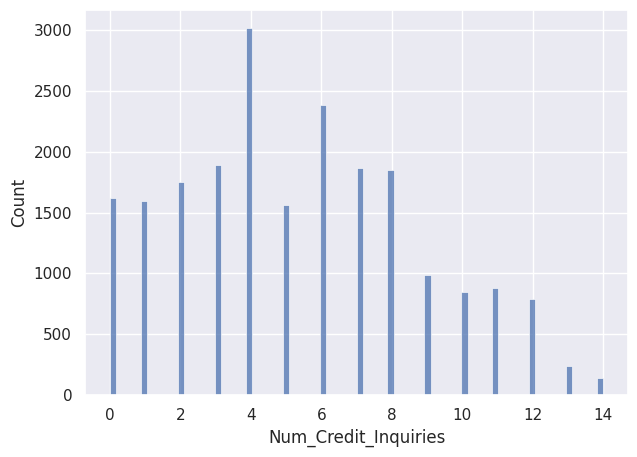

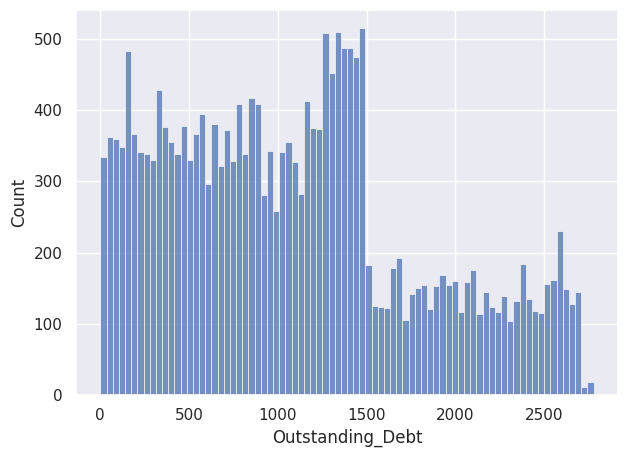

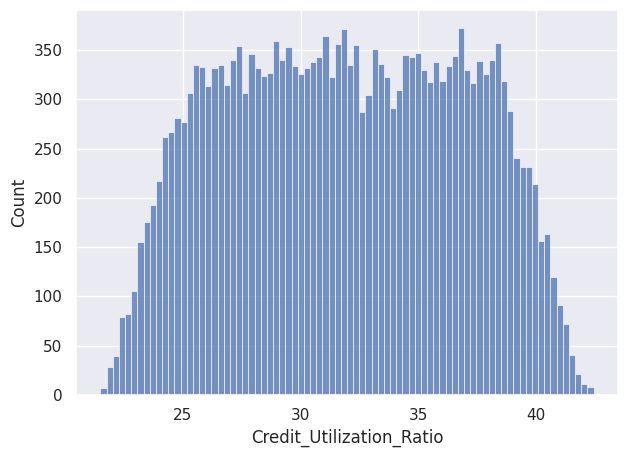

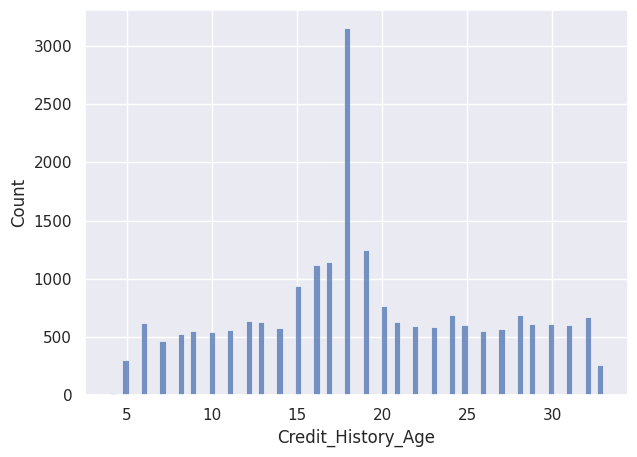

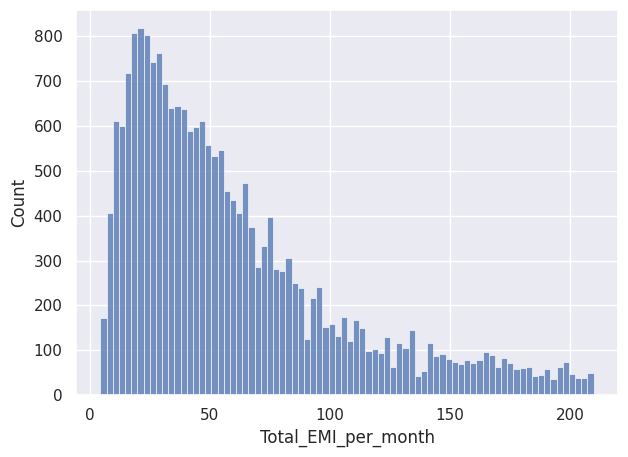

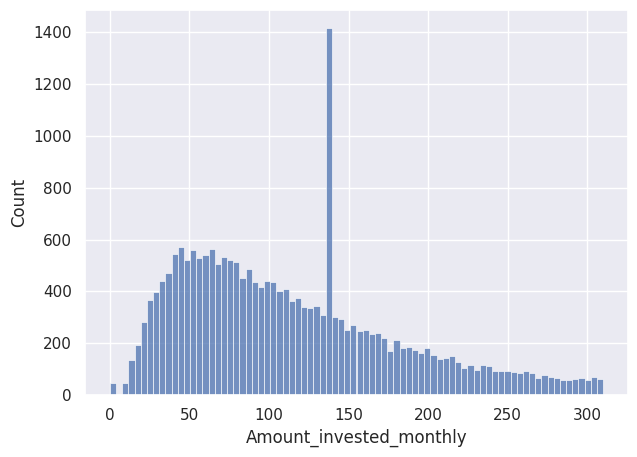

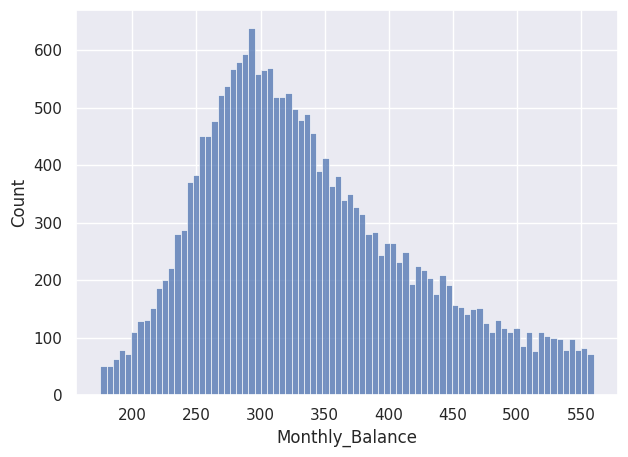

In [274]:
for column in cols:
    plt.figure(figsize = (7, 5))
    sns.histplot(data = dataset4, x = column, bins = 80)
    plt.show()

In [275]:
q1 = dataset4['Annual_Income'].quantile(0.01)

In [276]:
q1

7472.54

In [277]:
dataset4[dataset4['Annual_Income'] < 7472].shape

(210, 47)

In [278]:
q3 = dataset4['Annual_Income'].quantile(0.99)

In [279]:
q3

76448.3871

In [280]:
dataset4[dataset4['Annual_Income'] > 76448].shape

(215, 47)

In [281]:
dataset4 = dataset4[dataset4['Annual_Income'] > q1]

In [282]:
dataset4 = dataset4[dataset4['Annual_Income'] < q3]

In [283]:
dataset4.shape

(20971, 47)

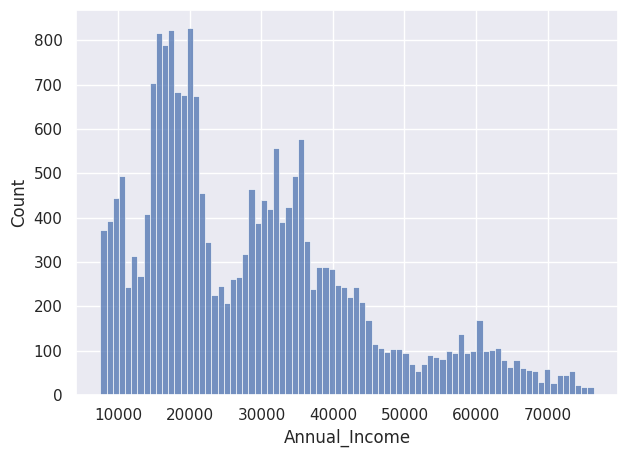

In [284]:
plt.figure(figsize = (7, 5))
sns.histplot(data = dataset4, x = 'Annual_Income', bins = 80)
plt.show()

In [285]:
q1 = dataset4['Monthly_Inhand_Salary'].quantile(0.01)

In [286]:
dataset4[dataset4['Monthly_Inhand_Salary'] < q1].shape

(208, 47)

In [287]:
q3 = dataset4['Monthly_Inhand_Salary'].quantile(0.99)

In [288]:
dataset4[dataset4['Monthly_Inhand_Salary'] > q3].shape

(210, 47)

In [289]:
dataset4 = dataset4[dataset4['Monthly_Inhand_Salary'] > q1]

In [290]:
dataset4 = dataset4[dataset4['Monthly_Inhand_Salary'] < q3]

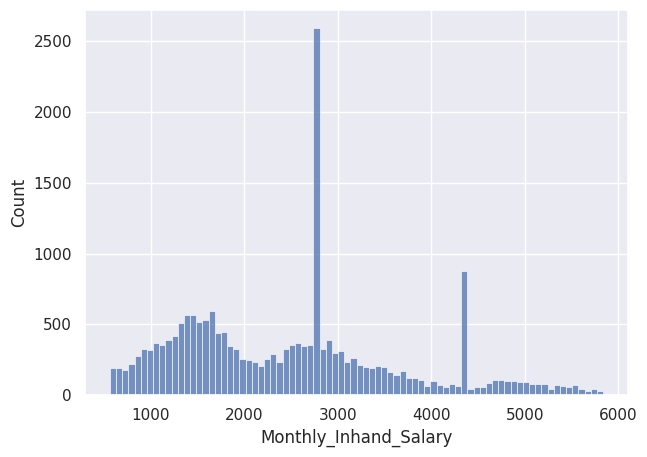

In [291]:
plt.figure(figsize = (7, 5))
sns.histplot(data = dataset4, x = 'Monthly_Inhand_Salary', bins = 80)
plt.show()

In [292]:
dataset4[dataset4['Num_Credit_Card'] == 0].shape

(2, 47)

In [293]:
dataset4 = dataset4[dataset4['Num_Credit_Card'] != 0]

In [294]:
q1 = dataset4['Interest_Rate'].quantile(0.01)

In [295]:
q3 = dataset4['Interest_Rate'].quantile(0.99)

In [296]:
dataset4[dataset4['Interest_Rate'] < q1].shape

(0, 47)

In [297]:
dataset4[dataset4['Interest_Rate'] > q3].shape

(178, 47)

In [298]:
dataset4 = dataset4[dataset4['Interest_Rate'] < q3]

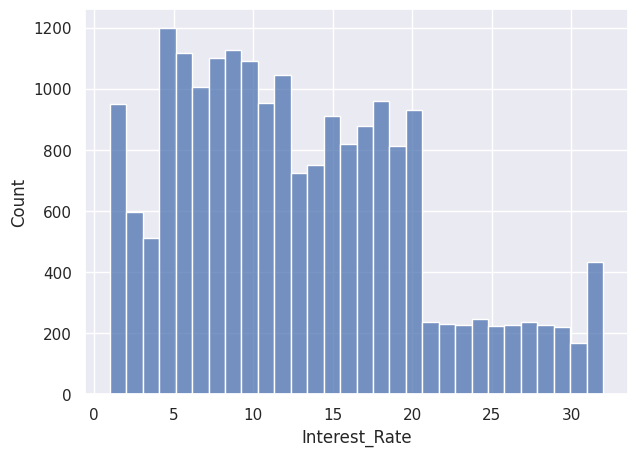

In [299]:
plt.figure(figsize = (7, 5))
sns.histplot(data = dataset4, x = 'Interest_Rate', bins = 30)
plt.show()

In [300]:
dataset4[dataset4['Num_of_Loan'] == 8].shape

(131, 47)

In [301]:
dataset4[dataset4['Num_of_Loan'] == 9].shape

(111, 47)

In [302]:
dataset4 = dataset4[dataset4['Num_of_Loan'] < 8]

In [303]:
q1 = dataset4['Delay_from_due_date'].quantile(0.01)

In [304]:
q3 = dataset4['Delay_from_due_date'].quantile(0.99)

In [305]:
dataset4[dataset4['Delay_from_due_date'] < q1].shape

(93, 47)

In [306]:
dataset4[dataset4['Delay_from_due_date'] > q3].shape

(158, 47)

In [307]:
dataset4 = dataset4[dataset4['Delay_from_due_date'] > q1]

In [308]:
dataset4 = dataset4[dataset4['Delay_from_due_date'] < q3]

In [309]:
dataset4.shape

(19424, 47)

In [310]:
q1 = dataset4['Delay_from_due_date'].quantile(0.01)

In [311]:
q3 = dataset4['Delay_from_due_date'].quantile(0.99)

In [312]:
dataset4 = dataset4[dataset4['Delay_from_due_date'] > q1]

In [313]:
dataset4 = dataset4[dataset4['Delay_from_due_date'] < q3]

In [314]:
dataset4.shape

(18938, 47)

In [315]:
q1 = dataset4['Changed_Credit_Limit'].quantile(0.01)

In [316]:
q3 = dataset4['Changed_Credit_Limit'].quantile(0.99)

In [317]:
dataset4 = dataset4[dataset4['Changed_Credit_Limit'] > q1]

In [318]:
dataset4 = dataset4[dataset4['Changed_Credit_Limit'] < q3]

In [319]:
dataset4.shape

(18558, 47)

In [320]:
q3 = dataset4['Outstanding_Debt'].quantile(0.99)

In [321]:
dataset4 = dataset4[dataset4['Outstanding_Debt'] < q3]

In [322]:
dataset4.shape

(18370, 47)

In [323]:
q1 = dataset4['Credit_Utilization_Ratio'].quantile(0.01)

In [324]:
q3 = dataset4['Credit_Utilization_Ratio'].quantile(0.99)

In [325]:
dataset4 = dataset4[dataset4['Credit_Utilization_Ratio'] > q1]

In [326]:
dataset4 = dataset4[dataset4['Credit_Utilization_Ratio'] < q3]

In [327]:
dataset4.shape

(18002, 47)

In [328]:
q1 = dataset4['Total_EMI_per_month'].quantile(0.01)

In [329]:
q3 = dataset4['Total_EMI_per_month'].quantile(0.99)

In [330]:
dataset4 = dataset4[dataset4['Total_EMI_per_month'] > q1]

In [331]:
dataset4 = dataset4[dataset4['Total_EMI_per_month'] < q3]

In [332]:
dataset4.shape

(17638, 47)

In [333]:
q1 = dataset4['Amount_invested_monthly'].quantile(0.01)

In [334]:
q3 = dataset4['Amount_invested_monthly'].quantile(0.99)

In [335]:
dataset4 = dataset4[dataset4['Amount_invested_monthly'] > q1]

In [336]:
dataset4 = dataset4[dataset4['Amount_invested_monthly'] < q3]

In [337]:
dataset4.shape

(17284, 47)

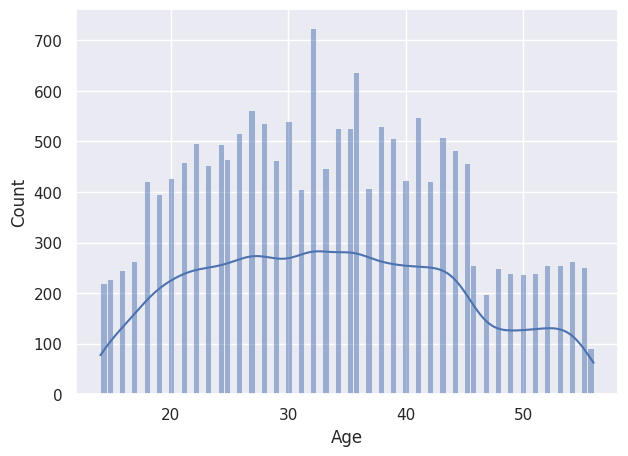

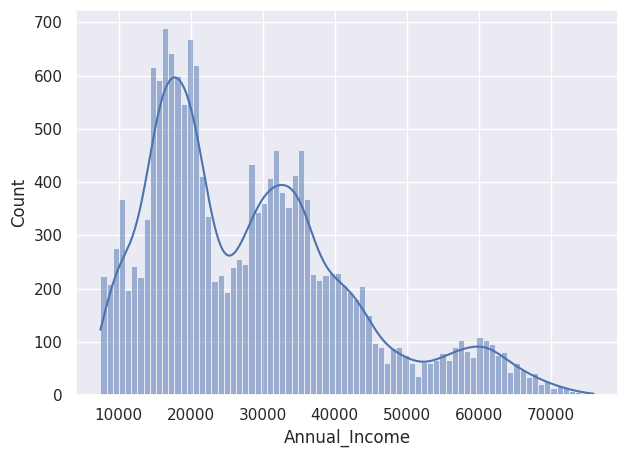

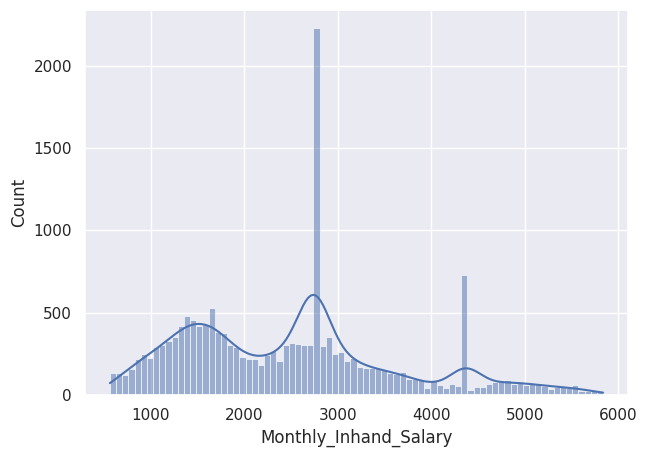

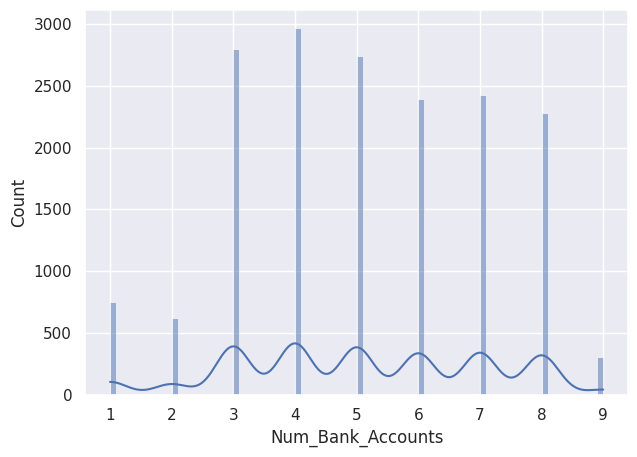

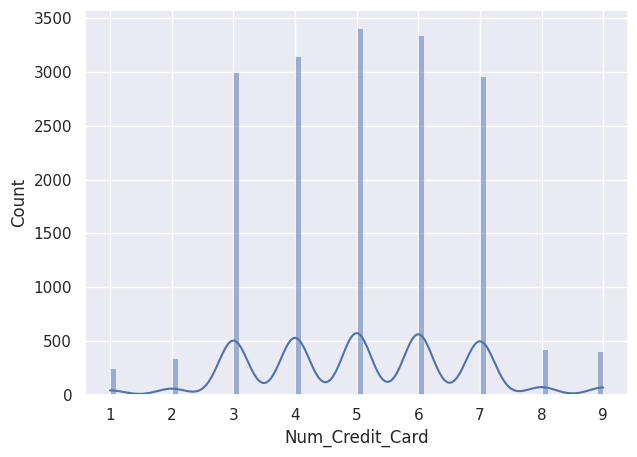

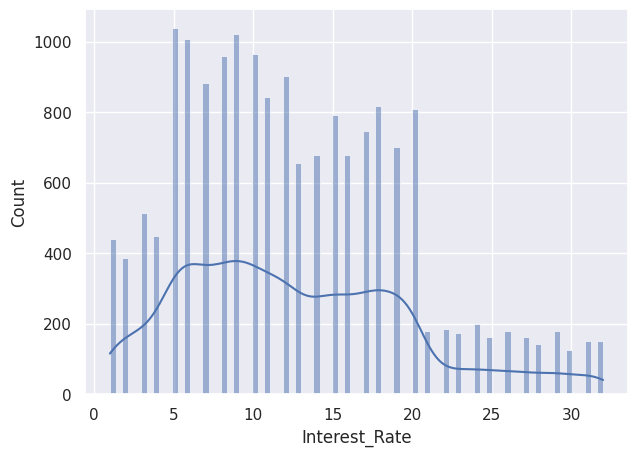

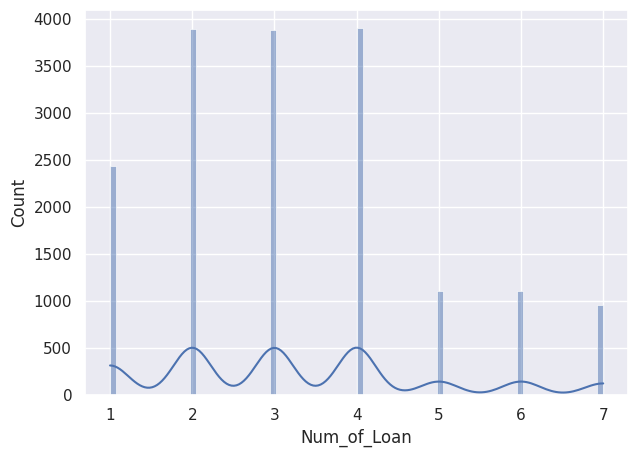

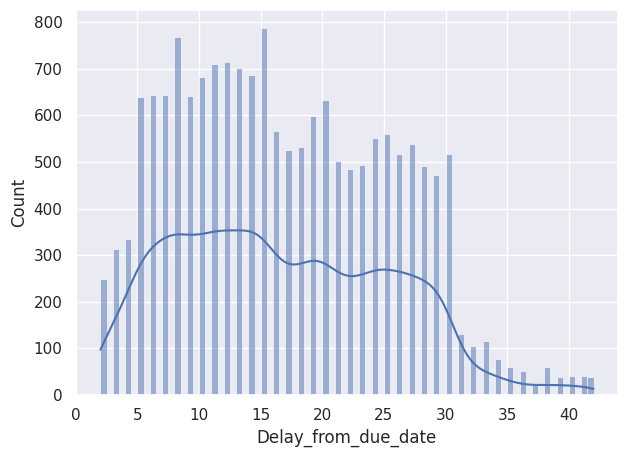

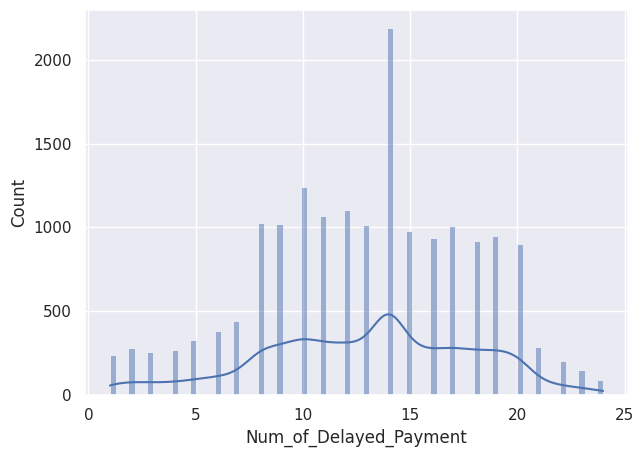

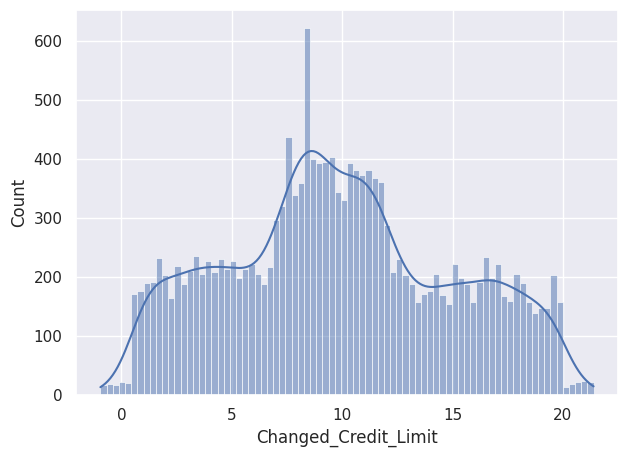

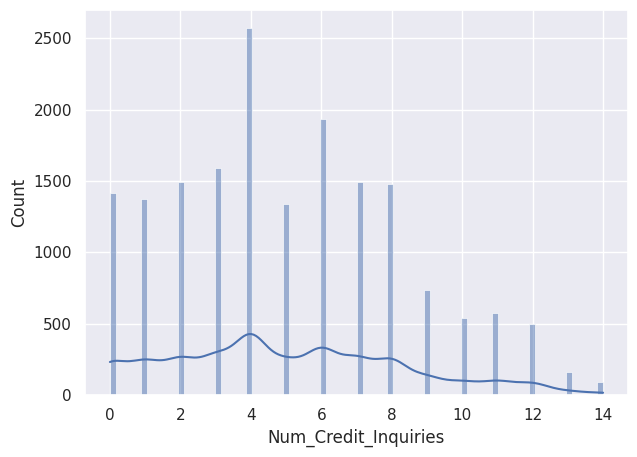

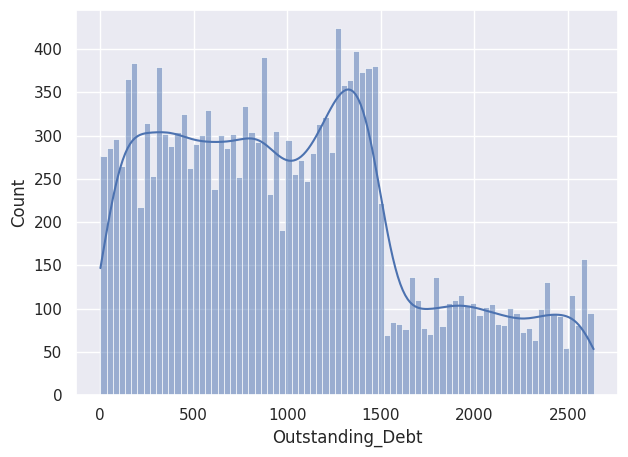

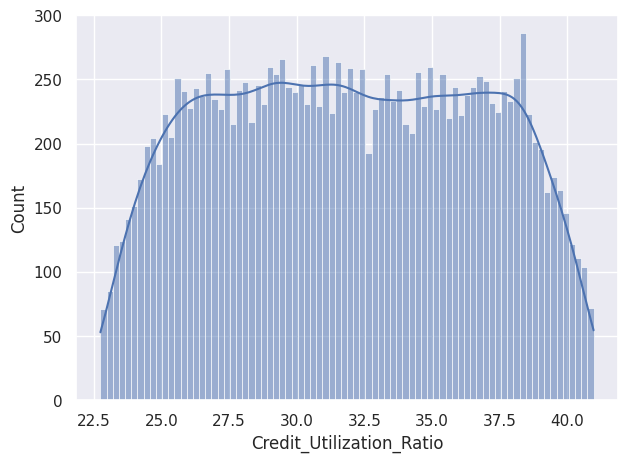

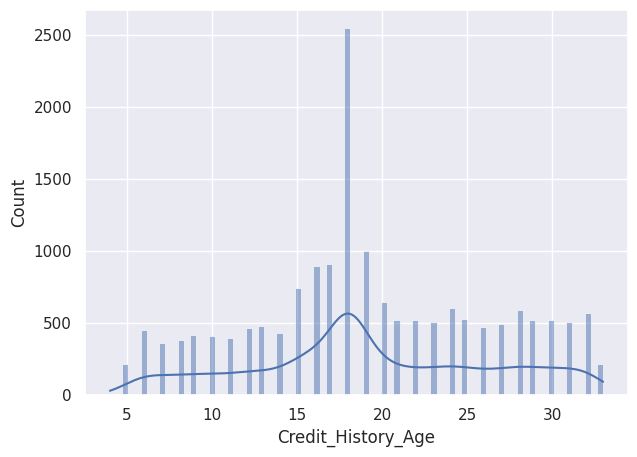

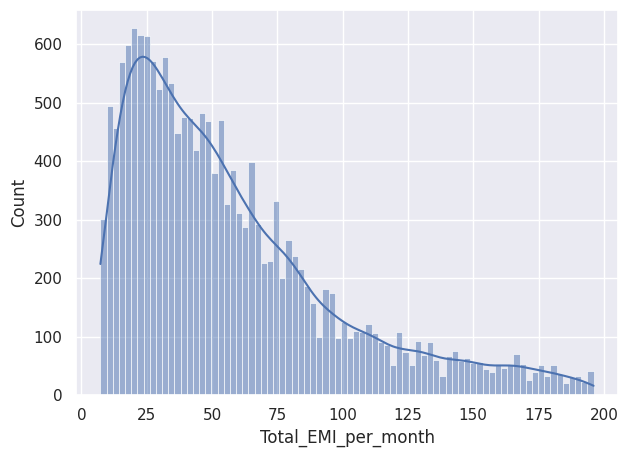

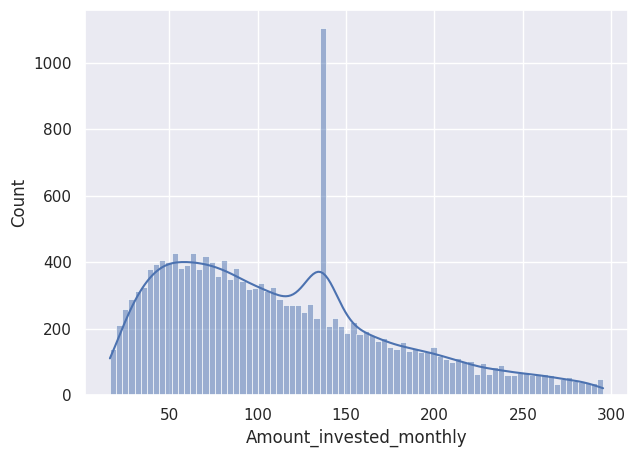

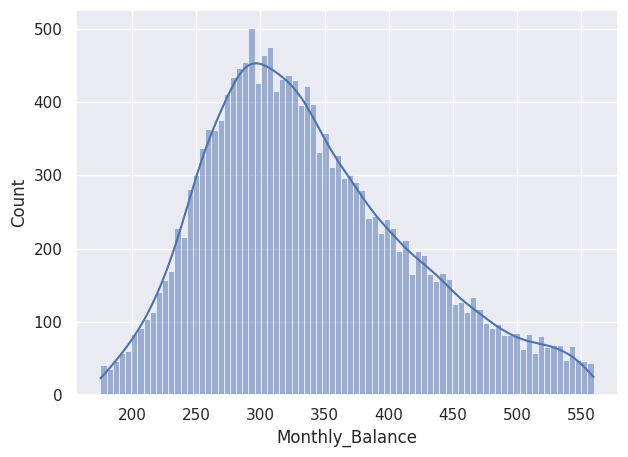

In [338]:
for column in cols:
    plt.figure(figsize = (7, 5))
    sns.histplot(data = dataset4, x = column, bins = 80, kde = True)
    plt.show()

In [339]:
dataset4.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,spent_Low,payments_Medium,payments_Small
count,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.00000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000
mean,33.611317,28543.980628,2497.865415,5.109292,5.058378,12.641402,3.25891,16.764464,12.948334,9.849307,5.072206,1021.755258,31.872212,19.270944,57.635651,112.814081,338.824706,0.118086,0.129484,0.126938,0.123756,0.125202,0.126128,0.124161,0.070296,0.066304,0.066478,0.064163,0.069197,0.070123,0.077818,0.062601,0.068156,0.064511,0.064973,0.064221,0.062833,0.064916,0.263018,0.679009,0.357903,0.523779,0.563238,0.331520,0.449317
std,10.712328,14150.760184,1150.754650,2.000124,1.663326,7.115424,1.63144,8.641845,4.943416,5.101862,3.304468,665.549144,4.813290,7.097808,41.131577,63.221973,80.124776,0.322719,0.335744,0.332913,0.329313,0.330958,0.332003,0.329775,0.255653,0.248820,0.249122,0.245051,0.253796,0.255361,0.267892,0.242251,0.252020,0.245667,0.246486,0.245154,0.242669,0.246384,0.440285,0.466871,0.479397,0.499449,0.495999,0.470773,0.497439
min,14.000000,7476.300000,563.159167,1.000000,1.000000,1.000000,1.00000,2.000000,1.000000,-0.950000,0.000000,0.560000,22.743582,4.000000,7.247943,16.606857,175.284150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,17433.615000,1556.084167,4.000000,4.000000,7.000000,2.00000,10.000000,10.000000,6.170000,3.000000,468.030000,27.801277,15.000000,26.427927,61.947825,279.998267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,26281.030000,2514.291667,5.000000,5.000000,12.000000,3.00000,16.000000,13.000000,9.560000,5.000000,954.440000,31.814388,18.000000,46.382849,102.569949,326.080583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,42.000000,36080.590000,3045.680000,7.000000,6.000000,17.000000,4.00000,24.000000,17.000000,13.482500,7.000000,1409.012500,35.981842,25.000000,76.581675,148.496526,388.856623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,56.000000,75982.740000,5838.858333,9.000000,9

In [340]:
dataset4.head()

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,spent_Low,payments_Medium,payments_Small
136,0x16ce,45.0,32284.62,2898.385,6,7,17,6.0,11,12.0,9.22,8.0,1283.37,28.940893,6,103.03756,254.861615,211.939325,Standard,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0
137,0x16cf,46.0,32284.62,2898.385,6,7,17,6.0,11,12.0,9.22,8.0,1283.37,27.861310,6,103.03756,103.210307,353.590632,Standard,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0
138,0x16d0,46.0,32284.62,2898.385,6,7,17,6.0,10,12.0,9.22,8.0,1283.37,27.881697,6,103.03756,35.793568,391.007371,Standard,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
139,0x16d1,46.0,32284.62,2898.385,6,7,17,6.0,11,12.0,9.22,8.0,1283.37,38.394558,6,103.03756,280.218254,196.582686,Standard,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1
141,0x16d3,46.0,32284.62,2898.385,6,7,17,6.0,11,12.0,8.22,10.0,1283.37,26.874467,6,103.03756,272.273550,204.527390,Standard,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1


In [341]:
dataset4['Credit_Score'].value_counts()

Credit_Score
Standard    10643
Poor         3789
Good         2852
Name: count, dtype: int64

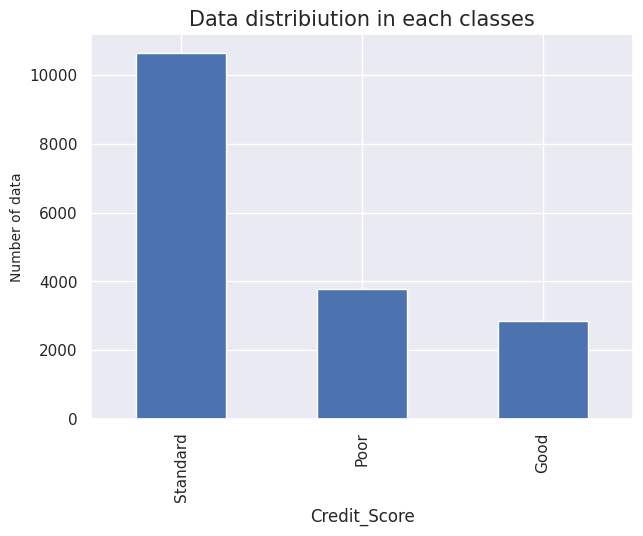

In [342]:
dataset4['Credit_Score'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribiution in each classes', fontsize = 15)
plt.ylabel('Number of data', fontsize = 10)
plt.show()

In [343]:
dataset4.reset_index(drop = True, inplace = True)

In [344]:
dataset4.head()

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,spent_Low,payments_Medium,payments_Small
0,0x16ce,45.0,32284.62,2898.385,6,7,17,6.0,11,12.0,9.22,8.0,1283.37,28.940893,6,103.03756,254.861615,211.939325,Standard,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0
1,0x16cf,46.0,32284.62,2898.385,6,7,17,6.0,11,12.0,9.22,8.0,1283.37,27.861310,6,103.03756,103.210307,353.590632,Standard,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0
2,0x16d0,46.0,32284.62,2898.385,6,7,17,6.0,10,12.0,9.22,8.0,1283.37,27.881697,6,103.03756,35.793568,391.007371,Standard,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0x16d1,46.0,32284.62,2898.385,6,7,17,6.0,11,12.0,9.22,8.0,1283.37,38.394558,6,103.03756,280.218254,196.582686,Standard,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1
4,0x16d3,46.0,32284.62,2898.385,6,7,17,6.0,11,12.0,8.22,10.0,1283.37,26.874467,6,103.03756,272.273550,204.527390,Standard,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1


In [345]:
le = LabelEncoder()

In [346]:
dataset4['Credit_Score'] = le.fit_transform(dataset4['Credit_Score'])

In [347]:
dataset4.head()

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,spent_Low,payments_Medium,payments_Small
0,0x16ce,45.0,32284.62,2898.385,6,7,17,6.0,11,12.0,9.22,8.0,1283.37,28.940893,6,103.03756,254.861615,211.939325,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0
1,0x16cf,46.0,32284.62,2898.385,6,7,17,6.0,11,12.0,9.22,8.0,1283.37,27.861310,6,103.03756,103.210307,353.590632,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0
2,0x16d0,46.0,32284.62,2898.385,6,7,17,6.0,10,12.0,9.22,8.0,1283.37,27.881697,6,103.03756,35.793568,391.007371,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0x16d1,46.0,32284.62,2898.385,6,7,17,6.0,11,12.0,9.22,8.0,1283.37,38.394558,6,103.03756,280.218254,196.582686,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1
4,0x16d3,46.0,32284.62,2898.385,6,7,17,6.0,11,12.0,8.22,10.0,1283.37,26.874467,6,103.03756,272.273550,204.527390,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1


In [348]:
dataset4.columns

Index(['ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score', 'Month_August', 'Month_February',
       'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Good', 'Credit_Mix_Standard',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Am

In [349]:
dataset4.shape

(17284, 47)

In [350]:
dataset4.apply(pd.isnull).sum()

ID                           0
Age                          0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Credit_History_Age           0
Total_EMI_per_month          0
Amount_invested_monthly      0
Monthly_Balance              0
Credit_Score                 0
Month_August                 0
Month_February               0
Month_January                0
Month_July                   0
Month_June                   0
Month_March                  0
Month_May                    0
Occupation_Architect         0
Occupation_Developer         0
Occupation_Doctor            0
Occupation_Engineer          0
Occupation_Entrepreneur      0
Occupation_Journalist        0
Occupati

In [351]:
dataset4.duplicated().sum()

0

In [352]:
X = dataset4.drop(columns = ['Credit_Score'])
y = dataset4['Credit_Score']

In [353]:
df1 = dataset4[dataset4['Credit_Score'] == 0]
df2 = dataset4[dataset4['Credit_Score'] == 1]
df3 = dataset4[dataset4['Credit_Score'] == 2]

In [354]:
df1.shape

(2852, 47)

In [355]:
X_train1 = df1[:int(df1.shape[0] * 0.8)]

In [356]:
X_test1 = df1[int(df1.shape[0] * 0.8):]

In [357]:
len(X_train1)

2281

In [358]:
len(X_test1)

571

In [359]:
X_train2 = df2[:int(df2.shape[0] * 0.8)]

In [360]:
X_test2 = df2[int(df2.shape[0] * 0.8):]

In [361]:
len(X_train2)

3031

In [362]:
len(X_test2)

758

In [363]:
X_train3 = df3[:int(df3.shape[0] * 0.8)]

In [364]:
X_test3 = df3[int(df3.shape[0] * 0.8):]

In [365]:
X_train = pd.concat([X_train1, X_train2, X_train3])

In [366]:
X_test = pd.concat([X_test1, X_test2, X_test3])

In [367]:
print('The size of training dataset is:', X_train.shape[0])
print('The size of test dataset is:', X_test.shape[0])

The size of training dataset is: 13826
The size of test dataset is: 3458


In [368]:
X_train['Credit_Score'].value_counts()

Credit_Score
2    8514
1    3031
0    2281
Name: count, dtype: int64

In [369]:
X_test['Credit_Score'].value_counts()

Credit_Score
2    2129
1     758
0     571
Name: count, dtype: int64

In [370]:
X_train_f = X_train.drop(columns = ['Credit_Score'], axis = 1)
y_train_f = X_train['Credit_Score']

In [371]:
X_test_f = X_test.drop(columns = ['Credit_Score'], axis = 1)
y_test_f = X_test['Credit_Score']

In [372]:
X_train_f.head()

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,spent_Low,payments_Medium,payments_Small
84,0x3fee,30.0,45238.04,3937.836667,7,6,7,7.0,25,8.0,9.25,13.0,1017.45,38.432578,9,147.695329,136.108242,343.140631,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
85,0x3fef,41.0,45238.04,3937.836667,7,6,7,7.0,25,9.0,9.25,13.0,1017.45,29.498097,9,147.695329,119.962562,376.125776,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
141,0x5842,19.0,13754.50,1261.208333,4,3,5,6.0,4,10.0,16.85,8.0,39.59,25.668957,6,61.012322,28.034120,287.074392,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
142,0x5843,19.0,13754.50,2742.400833,4,3,5,6.0,6,14.0,19.85,8.0,39.59,28.893459,7,61.012322,99.716523,235.391989,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
238,0x7ed9,22.0,23520.69,1746.057500,7,7,6,7.0,31,10.0,8.21,6.0,1235.31,40.414985,10,85.374591,33.706226,295.524933,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [373]:
X_train_f.drop(columns = ['ID'], axis = 'columns', inplace = True)

In [374]:
X_test_f.drop(columns = ['ID'], axis = 'columns', inplace = True)

In [375]:
X_train_s, y_train_s = shuffle(X_train_f, y_train_f)

In [376]:
X_test_s, y_test_s = shuffle(X_test_f, y_test_f)

In [377]:
model1 = DecisionTreeClassifier()

In [378]:
grid_param = {'criterion' : ['entropy'], 'max_depth' : [4, 8, 12, 16],
             'min_samples_split' : [5, 10, 20], 'min_samples_leaf' : [5, 10, 20],
             'max_features' : [2, 4, 6], 'class_weight' : ['balanced'],
             'random_state' : [100]}

In [379]:
grid1 = GridSearchCV(estimator = model1, param_grid = grid_param, cv = 5)

In [380]:
grid1.fit(X_train_s, y_train_s)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'], 'criterion': ['entropy'],
                         'max_depth': [4, 8, 12, 16], 'max_features': [2, 4, 6],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20],
                         'random_state': [100]})

In [381]:
grid1.best_score_

0.763925057433391

In [382]:
grid1.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'random_state': 100}

In [383]:
print('The validation accuracy score for model1 is:', grid1.best_score_)

The validation accuracy score for model1 is: 0.763925057433391


In [384]:
grid_param2 = {'criterion' : ['entropy'], 'max_depth' : [6, 8, 10], 
              'min_samples_split' : [3, 5, 10], 'min_samples_leaf' : [7, 10, 13],
              'max_features' : [6, 8, 10], 'class_weight' : ['balanced'],
              'random_state' : [100], 'max_leaf_nodes' : [2, 4, 6]}

In [385]:
grid2 = GridSearchCV(estimator = model1, param_grid = grid_param2, cv = 5)

In [386]:
grid2.fit(X_train_s, y_train_s)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'], 'criterion': ['entropy'],
                         'max_depth': [6, 8, 10], 'max_features': [6, 8, 10],
                         'max_leaf_nodes': [2, 4, 6],
                         'min_samples_leaf': [7, 10, 13],
                         'min_samples_split': [3, 5, 10],
                         'random_state': [100]})

In [387]:
grid2.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 6,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 7,
 'min_samples_split': 3,
 'random_state': 100}

In [388]:
print('The validation accuracy score for model2 is:', grid2.best_score_)

The validation accuracy score for model2 is: 0.7353532104513735


In [389]:
bagging_classifier = BaggingClassifier(base_estimator = model1)

In [390]:
grid_params3 = {'max_features' : [4, 6, 8], 'n_estimators' : [80, 100, 120],
               'max_samples' : [0.8] }

In [391]:
grid3 = GridSearchCV(estimator = bagging_classifier, param_grid = grid_params3, cv = 5)

In [392]:
grid3.fit(X_train_s, y_train_s)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'max_features': [4, 6, 8], 'max_samples': [0.8],
                         'n_estimators': [80, 100, 120]})

In [393]:
grid3.best_params_

{'max_features': 8, 'max_samples': 0.8, 'n_estimators': 120}

In [394]:
print('The validation accuracy score for model3 is:', grid3.best_score_)

The validation accuracy score for model3 is: 0.8079707478697017


In [395]:
grid_params4 = {'max_features' : [8, 12, 16], 'n_estimators' : [80, 100, 120], 'max_samples' : [0.8]}

In [396]:
grid4 = GridSearchCV(estimator = bagging_classifier, param_grid = grid_params4, cv = 5)

In [ ]:
grid4.fit(X_train_s, y_train_s)

In [398]:
grid4.best_params_

{'max_features': 16, 'max_samples': 0.8, 'n_estimators': 80}

In [399]:
print('The validation accuracy score for model4 is:', grid4.best_score_)

The validation accuracy score for model4 is: 0.8313314217199551


In [400]:
grid_params5 = {'max_features' : [16, 20, 24], 'n_estimators' : [100], 'max_samples' : [0.8]}

In [401]:
grid5 = GridSearchCV(estimator = bagging_classifier, param_grid = grid_params5, cv = 5)

In [402]:
grid5.fit(X_train_s, y_train_s)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'max_features': [16, 20, 24], 'max_samples': [0.8],
                         'n_estimators': [100]})

In [403]:
grid5.best_params_

{'max_features': 20, 'max_samples': 0.8, 'n_estimators': 100}

In [404]:
print('The validation accuracy score for model5 is:', grid5.best_score_)

The validation accuracy score for model5 is: 0.8335741024765984


In [405]:
grid_params6 = {'max_features' : [24, 28, 32, 38, 42, 48], 'n_estimators' : [100], 'max_samples' : [0.8]}

In [406]:
grid6 = GridSearchCV(estimator = bagging_classifier, param_grid = grid_params6, cv = 5)

In [407]:
grid6.fit(X_train_s, y_train_s)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'max_features': [24, 28, 32, 38, 42, 48],
                         'max_samples': [0.8], 'n_estimators': [100]})

In [408]:
grid6.best_params_

{'max_features': 32, 'max_samples': 0.8, 'n_estimators': 100}

In [409]:
print('The validation accuracy for model6 is:', grid6.best_score_)

The validation accuracy for model6 is: 0.839143173565865


In [431]:
dt = DecisionTreeClassifier(class_weight = 'balanced', criterion = 'entropy', max_depth = 2, max_features = 6,
                           min_samples_leaf = 5, min_samples_split = 20, random_state = 100)

In [432]:
main_bagging = BaggingClassifier(base_estimator = dt, max_samples = 0.8, max_features = 32, n_estimators = 100)

In [433]:
main_bagging.fit(X_train_s, y_train_s)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        criterion='entropy',
                                                        max_depth=2,
                                                        max_features=6,
                                                        min_samples_leaf=5,
                                                        min_samples_split=20,
                                                        random_state=100),
                  max_features=32, max_samples=0.8, n_estimators=100)

In [434]:
y_pred1 = main_bagging.predict(X_test_s)

In [435]:
print(classification_report(y_test_s, y_pred1))

              precision    recall  f1-score   support

           0       0.28      1.00      0.44       571
           1       1.00      0.08      0.15       758
           2       0.84      0.55      0.66      2129

    accuracy                           0.52      3458
   macro avg       0.71      0.54      0.42      3458
weighted avg       0.79      0.52      0.51      3458



In [465]:
dt2 = DecisionTreeClassifier(max_depth = 2)

In [466]:
adaboost = AdaBoostClassifier(base_estimator = dt2, n_estimators = 50, learning_rate = 1)

In [467]:
cvs = cross_val_score(adaboost, X_train_s, y_train_s, cv = 5)

In [468]:
print('The validation accuracy score of AdaBoostClassifier is:', cvs.mean())

The validation accuracy score of AdaBoostClassifier is: 0.7801961038128973


In [469]:
adaboost.fit(X_train_s, y_train_s)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1)

In [470]:
y_pred2 = adaboost.predict(X_test_s)

In [472]:
print(classification_report(y_test_s, y_pred2))

              precision    recall  f1-score   support

           0       0.28      1.00      0.44       571
           1       1.00      0.07      0.12       758
           2       0.83      0.53      0.65      2129

    accuracy                           0.51      3458
   macro avg       0.70      0.53      0.40      3458
weighted avg       0.78      0.51      0.50      3458



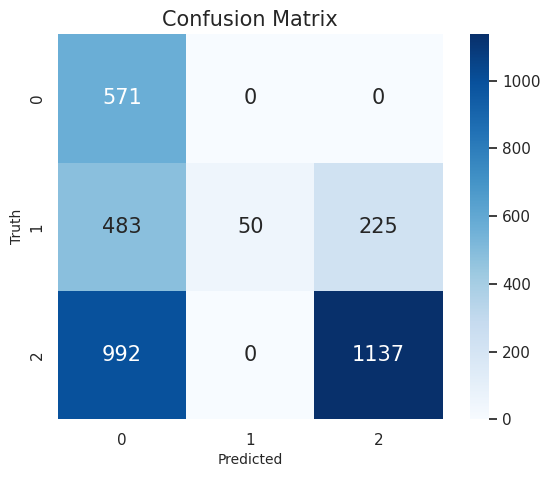

In [475]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test_s, y_pred2), annot = True, square = True, cbar = True,
           annot_kws = {'size' : 15}, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [477]:
scaler = StandardScaler()

In [478]:
X_train_scaled = scaler.fit_transform(X_train_s)

In [479]:
X_test_scaled = scaler.transform(X_test_s)

In [480]:
k = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

In [483]:
accuracy = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i, p = 3, metric = 'euclidean')
    cvs2 = cross_val_score(knn, X_train_scaled, y_train_s, cv = 5)
    accuracy.append(cvs2.mean())

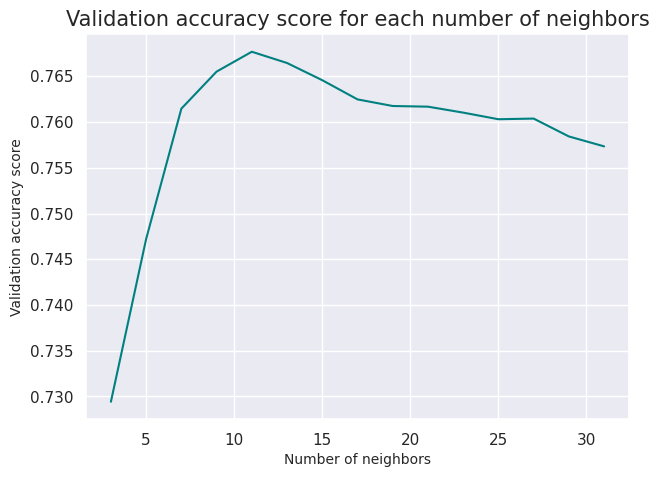

In [484]:
plt.figure(figsize = (7, 5))
plt.plot(k, accuracy, color = 'teal')
plt.title('Validation accuracy score for each number of neighbors', fontsize = 15)
plt.xlabel('Number of neighbors', fontsize = 10)
plt.ylabel('Validation accuracy score', fontsize = 10)
plt.show()

In [485]:
knn_model = KNeighborsClassifier(n_neighbors = 13, p = 3, metric = 'euclidean')

In [486]:
knn_model.fit(X_train_scaled, y_train_s)

KNeighborsClassifier(metric='euclidean', n_neighbors=13, p=3)

In [487]:
y_p = knn_model.predict(X_test_scaled)

In [488]:
print(classification_report(y_test_s, y_p))

              precision    recall  f1-score   support

           0       0.29      0.96      0.45       571
           1       0.95      0.05      0.10       758
           2       0.80      0.57      0.67      2129

    accuracy                           0.52      3458
   macro avg       0.68      0.53      0.40      3458
weighted avg       0.75      0.52      0.51      3458



In [490]:
X_train_s.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,spent_Low,payments_Medium,payments_Small
count,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000,13826.000000
mean,33.029654,28156.936217,2452.139223,5.288876,5.124403,13.516418,3.435412,17.378996,13.477361,10.402192,5.514972,1086.296590,31.881871,17.479097,59.563127,110.831425,335.558378,0.117532,0.131781,0.129973,0.121366,0.122306,0.128092,0.124331,0.067409,0.065312,0.065601,0.066324,0.067482,0.068494,0.079994,0.062057,0.070447,0.066324,0.065890,0.062780,0.063504,0.065890,0.183278,0.746492,0.280558,0.602271,0.562129,0.329669,0.449588
std,10.524625,14193.284827,1138.447888,1.948083,1.668255,7.228609,1.684067,8.707819,4.728440,5.093026,3.338952,691.510747,4.824312,6.581339,41.919900,62.601064,79.502971,0.322065,0.338264,0.336285,0.326563,0.327651,0.334204,0.329971,0.250738,0.247084,0.247592,0.248857,0.250863,0.252601,0.271294,0.241268,0.255908,0.248857,0.248099,0.242576,0.243875,0.248099,0.386908,0.435035,0.449288,0.489447,0.496143,0.470110,0.497470
min,14.000000,7476.300000,563.159167,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,-0.950000,0.000000,0.560000,22.743582,4.000000,7.249926,16.606857,175.284150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,17165.778750,1525.760833,4.000000,4.000000,8.000000,2.000000,10.000000,10.000000,7.070000,3.000000,515.550000,27.801163,13.000000,27.736465,60.393276,277.848049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,25417.330000,2475.065000,5.000000,5.000000,13.000000,3.000000,17.000000,14.000000,10.180000,5.000000,1044.510000,31.816359,18.000000,48.513816,100.336348,322.101155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,41.000000,35849.770000,2953.807500,7.000000,6.000000,18.000000,4.000000,24.000000,17.000000,14.350000,8.000000,1476.965000,35.996022,20.000000,78.426226,145.242657,383.632052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,56.000000,75982.740000,5832.860000,

In [491]:
X_test_s.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,spent_Low,payments_Medium,payments_Small
count,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.00000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000
mean,35.936958,30091.486708,2680.690843,4.391267,4.794390,9.142857,2.553210,14.307403,10.833141,7.638725,3.301909,763.701917,31.833595,26.435223,49.929090,120.741262,351.884350,0.120301,0.120301,0.114806,0.133314,0.136784,0.118276,0.123482,0.081839,0.070272,0.069983,0.055523,0.076056,0.076634,0.069115,0.064777,0.058994,0.057259,0.061307,0.069983,0.06015,0.061018,0.581839,0.409196,0.667149,0.209948,0.567669,0.338924,0.448236
std,11.133973,13873.972314,1181.307929,2.044176,1.616985,5.370815,1.158374,7.910518,5.211986,4.504016,2.467305,467.886584,4.769461,3.803154,36.826629,65.054016,81.274270,0.325360,0.325360,0.318834,0.339963,0.343669,0.322982,0.329037,0.274159,0.255642,0.255155,0.229032,0.265125,0.266048,0.253686,0.246168,0.235647,0.232370,0.239927,0.255155,0.23780,0.239398,0.493328,0.491757,0.471302,0.407330,0.495471,0.473413,0.497385
min,14.000000,9022.160000,610.257917,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,-0.930000,0.000000,0.950000,22.744314,11.000000,7.247943,16.620513,178.304935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,19012.180000,1683.347917,3.000000,4.000000,5.000000,2.000000,8.000000,7.000000,4.060000,1.000000,365.970000,27.804076,23.000000,22.411006,68.683624,291.046289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,28949.600000,2649.490833,4.000000,5.000000,9.000000,3.000000,13.000000,11.000000,7.600000,3.000000,741.680000,31.800096,27.000000,39.434381,112.140580,342.828475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,45.000000,37679.190000,3400.389167,6.000000,6.000000,12.000000,4.000000,20.000000,14.000000,10.490000,4.000000,1148.497500,35.867310,30.000000,67.940814,160.478462,405.642090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,56.000000,74766.860000,5838.858333,9.000000,9.000000,32.000000,7.000000,42.000000,24.000000,21

In [498]:
y

0        2
1        2
2        2
3        2
4        2
        ..
17279    0
17280    0
17281    0
17282    0
17283    2
Name: Credit_Score, Length: 17284, dtype: int64

In [499]:
X_s, y_s = shuffle(X, y)

In [500]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_s, y_s, test_size = 0.2, random_state = 101, shuffle = True,
                                                           stratify = y_s)

In [501]:
dt_model = DecisionTreeClassifier()

In [502]:
bg_model = BaggingClassifier(base_estimator = dt_model)

In [503]:
param_grid = {'max_samples' : [0.8], 'n_estimators' : [100], 'max_features' : [20, 24, 28, 32, 36, 39]}

In [504]:
grid_model = GridSearchCV(estimator = bg_model, param_grid = param_grid, cv = 5)

In [507]:
X_train_n.drop(columns = ['ID'], axis = 1, inplace = True)

In [508]:
X_test_n.drop(columns = ['ID'], axis = 1, inplace = True)

In [509]:
grid_model.fit(X_train_n, y_train_n)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'max_features': [20, 24, 28, 32, 36, 39],
                         'max_samples': [0.8], 'n_estimators': [100]})

In [511]:
grid_model.best_params_

{'max_features': 28, 'max_samples': 0.8, 'n_estimators': 100}

In [512]:
grid_model.best_score_

0.799885120142678

In [514]:
m1 = BaggingClassifier(base_estimator = dt_model, max_features = 28, max_samples = 0.8, n_estimators = 100)

In [515]:
m1.fit(X_train_n, y_train_n)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=28,
                  max_samples=0.8, n_estimators=100)

In [516]:
y_p2 = m1.predict(X_test_n)

In [517]:
print(classification_report(y_test_n, y_p2))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72       570
           1       0.77      0.69      0.73       758
           2       0.84      0.87      0.85      2129

    accuracy                           0.80      3457
   macro avg       0.78      0.76      0.77      3457
weighted avg       0.80      0.80      0.80      3457



In [526]:
param_grid_2 = {'class_weight' : ['balanced'], 'criterion' : ['entropy'], 'max_depth' : [4, 8, 16, 20], 
               'max_features' : [16, 20, 24, 28, 32], 
               'min_samples_split' : [5, 15, 20, 25], 'random_state' : [101]}

In [527]:
grid_m = GridSearchCV(estimator = dt_model, param_grid = param_grid_2, cv = 5)

In [528]:
grid_m.fit(X_train_n, y_train_n)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'], 'criterion': ['entropy'],
                         'max_depth': [4, 8, 16, 20],
                         'max_features': [16, 20, 24, 28, 32],
                         'min_samples_split': [5, 15, 20, 25],
                         'random_state': [101]})

In [529]:
grid_m.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 24,
 'min_samples_split': 20,
 'random_state': 101}

In [530]:
dt_model_f = DecisionTreeClassifier(class_weight = 'balanced', criterion = 'entropy', max_depth = 8, max_features = 24,
                                   min_samples_split = 20, random_state = 101)

In [531]:
dt_model_f.fit(X_train_n, y_train_n)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, max_features=24, min_samples_split=20,
                       random_state=101)

In [532]:
dt_pred = dt_model_f.predict(X_test_n)

In [533]:
print(classification_report(y_test_n, dt_pred))

              precision    recall  f1-score   support

           0       0.53      0.79      0.64       570
           1       0.62      0.69      0.65       758
           2       0.88      0.73      0.80      2129

    accuracy                           0.73      3457
   macro avg       0.68      0.74      0.70      3457
weighted avg       0.77      0.73      0.74      3457



In [534]:
dt_model3 = DecisionTreeClassifier(class_weight = 'balanced', random_state = 101, criterion = 'entropy', max_depth = 8,
                                  min_samples_split = 20)

In [535]:
m2 = BaggingClassifier(base_estimator = dt_model3, max_samples = 0.8, max_features = 24)

In [536]:
m2.fit(X_train_n, y_train_n)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        criterion='entropy',
                                                        max_depth=8,
                                                        min_samples_split=20,
                                                        random_state=101),
                  max_features=24, max_samples=0.8)

In [537]:
y_p3 = m2.predict(X_test_n)

In [538]:
print(classification_report(y_test_n, y_p3))

              precision    recall  f1-score   support

           0       0.52      0.80      0.63       570
           1       0.67      0.64      0.65       758
           2       0.88      0.76      0.82      2129

    accuracy                           0.74      3457
   macro avg       0.69      0.74      0.70      3457
weighted avg       0.77      0.74      0.75      3457



In [555]:
dt_model4 = DecisionTreeClassifier(max_depth = 2)

In [556]:
adaboost_model = AdaBoostClassifier(base_estimator = dt_model4, n_estimators = 50, learning_rate = 1)

In [557]:
ada_cvs = cross_val_score(adaboost_model, X_train_n, y_train_n, cv = 5)

In [558]:
ada_cvs.mean()

0.7324084105758507

In [559]:
adaboost_model.fit(X_train_n, y_train_n)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1)

In [560]:
y_pr = adaboost_model.predict(X_test_n)

In [561]:
print(classification_report(y_test_n, y_pr))

              precision    recall  f1-score   support

           0       0.59      0.56      0.57       570
           1       0.67      0.54      0.59       758
           2       0.77      0.84      0.80      2129

    accuracy                           0.73      3457
   macro avg       0.68      0.64      0.66      3457
weighted avg       0.72      0.73      0.72      3457



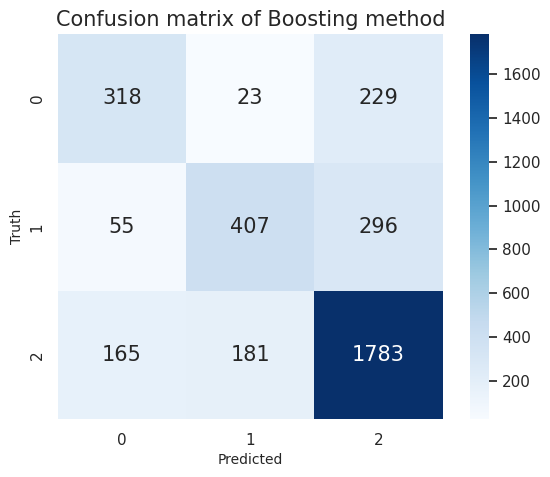

In [562]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test_n, y_pr), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion matrix of Boosting method', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

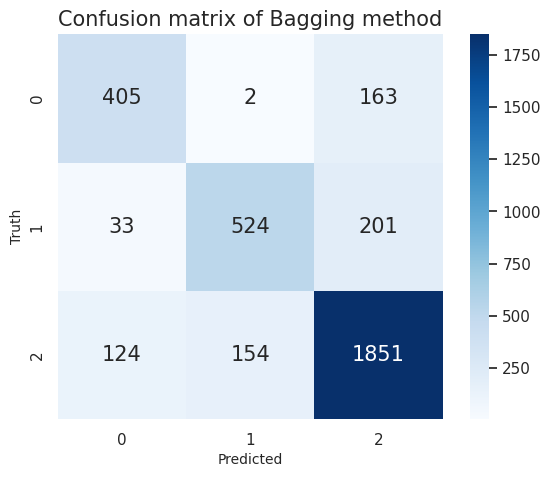

In [563]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test_n, y_p2), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion matrix of Bagging method', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

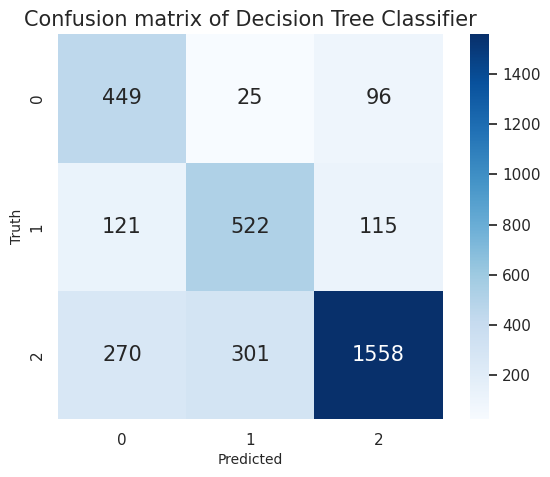

In [564]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test_n, dt_pred), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion matrix of Decision Tree Classifier', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()